# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings("ignore")

C:\Users\tunahan.aktas\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


---

# Read Files

In [2]:
start = time.time()

In [3]:
# List of Excel Files
sales_lst = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Demand Sensing Sales History") or doc_.startswith("Demand_Sensing_Sales_")])
saha_aktivite_lst = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Demand_Sensing_Saha_Aktivit") or doc_.startswith("Demand Sensing Saha Aktivit")])
pasifik_aktivite_lst = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Pasifik Aktivite Datası")])
fiyat_lst = sorted([doc_ for doc_ in os.listdir("../data") if "Fiyat List" in doc_])
portfoy_lst = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Portföy")])
eslenik_kod_lst = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Ürün Eşlenik kodlar")])
kapsam_listeli = sorted([doc_ for doc_ in os.listdir("../data") if doc_.startswith("Listeli Ürün")])

In [4]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Dosyaları okuma işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Dosyaları okuma işlemi 0 saat, 00 dakika, 01.64 saniye sürmüştür.


---
# Read Data
---

In [5]:
start = time.time()

In [6]:
# Read Sales Data
pasifik_df_all = []
btt_df_all = []
horizon_saha_df_all = []
chng_cols_beginning = {'Year': 'Yıl', 'Quarter': 'Çeyrek', 'Month': 'Ay', 
                       'Company Code': 'Şirket Kodu', 'Main Category Name': 'Ana Kategori Adı', 
                       'Category Name': 'Kategori Adı', 'Brand Name': 'Marka Adı', 'Product Code': 'Ürün Kodu', 
                       'Product Name': 'Ürün Adı', "Ürün Adı (Mobis)": 'Ürün Adı'}
for docs_ in sales_lst:
    pasifik_df_all.append(pd.read_excel("../data/"+docs_, skiprows=1, sheet_name="Pasifik SAP Satış", usecols="B:P").rename(columns=chng_cols_beginning))
    btt_df_all.append(pd.read_excel("../data/"+docs_, skiprows=1, sheet_name="BTT SAP Satış", usecols="B:N").rename(columns=chng_cols_beginning))
    horizon_saha_df_all.append(pd.read_excel("../data/"+docs_, skiprows=1, sheet_name="Horizon Saha Satış", usecols="B:N").rename(columns=chng_cols_beginning))
pasifik_df_all = pd.concat(pasifik_df_all)
btt_df_all = pd.concat(btt_df_all)
horizon_saha_df_all = pd.concat(horizon_saha_df_all)


chng_cols = {"Saha Müşteri Grup": "Grup adı", "Ürün Adı (Mobis)": "Ürün Adı"}

pasifik_df_all.rename(columns=chng_cols, inplace=True)
btt_df_all.rename(columns=chng_cols, inplace=True)
horizon_saha_df_all.rename(columns=chng_cols, inplace=True)

btt_df_all["Grup adı"], btt_df_all["Grup Kodu."] = "BTT", 0
horizon_saha_df_all["Şirket Kodu"], horizon_saha_df_all["Grup Kodu."] = 0, 0

btt_df_all = btt_df_all[pasifik_df_all.columns.to_list()]
horizon_saha_df_all = horizon_saha_df_all[pasifik_df_all.columns.to_list()]

enflasyon_df = pd.read_excel("../data/enflasyon.xlsx")

yarisma_df = pd.read_excel("../data/2018-2021 Yarışmaları_v2.xlsx", sheet_name="yarisma_historik_data")

In [7]:
# Read Saha Aktiviteleri
saha_aktivite_detay = []
saha_aktivite_cat = []

for docs_ in saha_aktivite_lst:
    saha_aktivite_detay.append(pd.read_excel("../data/"+docs_, skiprows=1, sheet_name="Ürün Detay", usecols="B:M"))
    saha_aktivite_cat.append(pd.read_excel("../data/"+docs_, skiprows=1, sheet_name="Kategori", usecols="B:I"))
saha_aktivite_detay = pd.concat(saha_aktivite_detay)
saha_aktivite_cat = pd.concat(saha_aktivite_cat)

In [8]:
# Read Pasifik Aktiviteleri
pasifik_aktivite_df = pd.read_excel("../data/"+pasifik_aktivite_lst[0])

In [9]:
# Read Fiyat Listesi
fiyat_lst_pasifik = pd.read_excel("../data/"+fiyat_lst[0])
fiyat_lst_horizon = pd.read_excel("../data/"+fiyat_lst[1])

In [10]:
# Read Portföy
pasifik_portfoy_df = pd.read_excel("../data/"+portfoy_lst[0], sheet_name="Pasifik Portföy", skiprows=3, usecols="D:H")
btt_portfoy_df = pd.read_excel("../data/"+portfoy_lst[0], sheet_name="BTT Portföy", skiprows=2, usecols="D:H")
horizon_portfoy_df = pd.read_excel("../data/"+portfoy_lst[0], sheet_name="Horizon Portföy", skiprows=2, usecols="E:I")

In [11]:
# Read Eşlenik Kodları
eslenik_kod_df = pd.read_excel("../data/"+eslenik_kod_lst[0])

In [12]:
# Read Calender
calender_df = pd.read_excel("../data/Calender_Monthly.xlsx")

In [13]:
# Read Plasiyer Yarışma
plasiyer_yarisma = pd.read_excel("../data/2018-2021 Yarışmaları.xlsx")

In [14]:
eslenik_kod_df["En Güncel Kod"] = eslenik_kod_df["En Güncel Kod"].apply(lambda x: int(x) if x not in ['delist ', "delist"] else x.replace(" ", ""))

In [15]:
a101_kapsam = pd.read_excel("../data/"+kapsam_listeli[0], sheet_name="A101 Portföy")
sok_kapsam = pd.read_excel("../data/"+kapsam_listeli[0], sheet_name="Şok Portföy")
bim_kapsam = pd.read_excel("../data/"+kapsam_listeli[0], sheet_name="Bim Portföy")

a101_kapsam["grup_adi"] = "A101"
sok_kapsam["grup_adi"] = "ŞOK"
bim_kapsam["grup_adi"] = "BİM"

kapsam_all = pd.concat([a101_kapsam, sok_kapsam, bim_kapsam], axis=0, ignore_index=True)

In [16]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Dataları okuma işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Dataları okuma işlemi 0 saat, 02 dakika, 51.68 saniye sürmüştür.


---
# Pasifik 2016 aktivite verileri olmadığı için 2016 Sales dataları çıkartıldı.

In [17]:
pasifik_df_all = pasifik_df_all[pasifik_df_all["Yıl"] != 2016].reset_index(drop=True)

---

# Sales Datası İçin Ürün Kod Eşleme

---

---

## Join

In [18]:
pasifik_df_all = pd.merge(pasifik_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
btt_df_all = pd.merge(btt_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
horizon_saha_df_all = pd.merge(horizon_saha_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")

In [19]:
pasifik_eslenik_kod_olmayan = pasifik_df_all[pd.isnull(pasifik_df_all["En Güncel Kod"])]
pasifik_eslenik_kod_olmayan_unique = pd.DataFrame(pasifik_df_all[pd.isnull(pasifik_df_all["En Güncel Kod"])]["Ürün Kodu"].unique(), columns=["Ürün Kodu"])

writer_pasifik = pd.ExcelWriter("../reports/pasifik_eslenik_kodu_olmayan.xlsx", engine = 'xlsxwriter')

pasifik_eslenik_kod_olmayan_unique.to_excel(writer_pasifik, sheet_name = 'eslenik_kod_olmayan_sku',index=False)
pasifik_eslenik_kod_olmayan.to_excel(writer_pasifik, sheet_name = 'eslenik_kod_olmayan_data',index=False)

writer_pasifik.save()
writer_pasifik.close()

In [20]:
btt_eslenik_kod_olmayan = btt_df_all[pd.isnull(btt_df_all["En Güncel Kod"])]
btt_eslenik_kod_olmayan_unique = pd.DataFrame(btt_df_all[pd.isnull(btt_df_all["En Güncel Kod"])]["Ürün Kodu"].unique(), columns=["Ürün Kodu"])

writer_btt = pd.ExcelWriter("../reports/btt_eslenik_kodu_olmayan.xlsx", engine = 'xlsxwriter')

btt_eslenik_kod_olmayan_unique.to_excel(writer_btt, sheet_name = 'eslenik_kod_olmayan_sku',index=False)
btt_eslenik_kod_olmayan.to_excel(writer_btt, sheet_name = 'eslenik_kod_olmayan_data',index=False)

writer_btt.save()
writer_btt.close()

In [21]:
horizon_eslenik_kod_olmayan = horizon_saha_df_all[pd.isnull(horizon_saha_df_all["En Güncel Kod"])]
horizon_eslenik_kod_olmayan_unique = pd.DataFrame(horizon_saha_df_all[pd.isnull(horizon_saha_df_all["En Güncel Kod"])]["Ürün Kodu"].unique(), columns=["Ürün Kodu"])

writer_horizon = pd.ExcelWriter("../reports/horizon_eslenik_kodu_olmayan.xlsx", engine = 'xlsxwriter')

horizon_eslenik_kod_olmayan_unique.to_excel(writer_horizon, sheet_name = 'eslenik_kod_olmayan_sku',index=False)
horizon_eslenik_kod_olmayan.to_excel(writer_horizon, sheet_name = 'eslenik_kod_olmayan_data',index=False)

writer_horizon.save()
writer_horizon.close()

## Ürün Eşleme Kodları dosyasında yer almayan kodlar için mevcut ürün kodları verildi.

In [22]:
empty_ = pasifik_df_all[pd.isnull(pasifik_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = pasifik_df_all[~pd.isnull(pasifik_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
pasifik_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
pasifik_df_all = pasifik_df_all.sort_values(pasifik_df_all.columns.to_list()).reset_index(drop=True)

empty_ = btt_df_all[pd.isnull(btt_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = btt_df_all[~pd.isnull(btt_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
btt_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
btt_df_all = btt_df_all.sort_values(btt_df_all.columns.to_list()).reset_index(drop=True)

empty_ = horizon_saha_df_all[pd.isnull(horizon_saha_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = horizon_saha_df_all[~pd.isnull(horizon_saha_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
horizon_saha_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
horizon_saha_df_all = horizon_saha_df_all.sort_values(horizon_saha_df_all.columns.to_list()).reset_index(drop=True)

## Adet adında yeni bir kolon oluşturuldu.

In [23]:
pasifik_df_all["Adet"] = pasifik_df_all["Koli İçi Adet"] * pasifik_df_all["Koli"]
btt_df_all["Adet"] = btt_df_all["Koli İçi Adet"] * btt_df_all["Koli"]
horizon_saha_df_all["Adet"] = horizon_saha_df_all["Koli İçi Adet"] * horizon_saha_df_all["Koli"]

## Delist olan ürünler veriden çıkartıldı.

In [24]:
pasifik_df_all = pasifik_df_all[pasifik_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)
btt_df_all = btt_df_all[btt_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)
horizon_saha_df_all = horizon_saha_df_all[horizon_saha_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)

## Aynı yıl, ay, grup adı, ana kategori adı, kategori adı, marka adı ve SKU kodundaki ürünler için toplam alındı. Sadece Koli İçi Adet için maksimum olan alındı.

---

# Marka adı dahil değil groupby'a
---

In [25]:
dct_to_sum = {"Koli İçi Adet": "sum", "Koli": "sum", "KG": "sum", "TL": "sum", "Adet": "sum"}

pasifik_df_all2 = pasifik_df_all.groupby(["Yıl", "Ay", "Grup adı", "Ana Kategori Adı", "Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()
btt_df_all2 = btt_df_all.groupby(["Yıl", "Ay", "Grup adı", "Ana Kategori Adı", "Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()
horizon_saha_df_all2 = horizon_saha_df_all.groupby(["Yıl", "Ay", "Grup adı", "Ana Kategori Adı", "Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()

In [26]:
pasifik_df_all2["Date"] = pasifik_df_all2["Yıl"].astype(str) + "-" +  pasifik_df_all2["Ay"].astype(str) + "-01"
btt_df_all2["Date"] = btt_df_all2["Yıl"].astype(str) + "-" +  btt_df_all2["Ay"].astype(str) + "-01"
horizon_saha_df_all2["Date"] = horizon_saha_df_all2["Yıl"].astype(str) + "-" +  horizon_saha_df_all2["Ay"].astype(str) + "-01"

pasifik_df_all2["Date"] = pd.to_datetime(pasifik_df_all2["Date"], format="%Y-%m-%d", errors="coerce")
btt_df_all2["Date"] = pd.to_datetime(btt_df_all2["Date"], format="%Y-%m-%d", errors="coerce")
horizon_saha_df_all2["Date"] = pd.to_datetime(horizon_saha_df_all2["Date"], format="%Y-%m-%d", errors="coerce")

## Horizon ve Pasifikte bulunan "Diğer"'lerin yanlarına "_" ile Diğer_Pasifik, Diğer_Horizon yazıldı.

In [27]:
pasifik_df_all2["Grup adı"] = pasifik_df_all2["Grup adı"].apply(lambda x: "Diğer_Pasifik" if x == "Diğer" else x)
horizon_saha_df_all2["Grup adı"] = horizon_saha_df_all2["Grup adı"].apply(lambda x: "Diğer_Horizon" if x == "Diğer" else x)

# Kontrol: Herhangi bir SKU için koli içi adeti birden fazla geldi mi?

---

In [28]:
pasifik_temp = pasifik_df_all.copy()
btt_temp = btt_df_all.copy()
horizon_temp = horizon_saha_df_all.copy()

pasifik_temp["Grup adı"] = pasifik_temp["Grup adı"].apply(lambda x: "Diğer_Pasifik" if x == "Diğer" else x)
horizon_temp["Grup adı"] = horizon_temp["Grup adı"].apply(lambda x: "Diğer_Horizon" if x == "Diğer" else x)

In [29]:
unique = pd.concat([pasifik_temp, btt_temp, horizon_temp], axis=0, ignore_index=True)

koli_ici_fark = pd.concat([unique.groupby(["En Güncel Kod", "Grup adı"]).agg({"Koli İçi Adet": "min"}), unique.groupby(["En Güncel Kod", "Grup adı"]).agg({"Koli İçi Adet": "max"})], axis=1)
koli_ici_fark.columns = ["min", "max"]
koli_ici_fark["Fark"] = koli_ici_fark["max"] - koli_ici_fark["min"]
koli_ici_fark.reset_index(inplace=True)
koli_ici_fark[koli_ici_fark["Fark"] != 0].to_excel("../reports/ayni_sku_kod_farkli_koli_adedi.xlsx", index=False)

# Kontrol: Güncel Koda denk gelen eski ürün isimleri neler?

In [30]:
unique_pasifik = pasifik_df_all[["En Güncel Kod", "Ürün Adı"]]
unique_btt = btt_df_all[["En Güncel Kod", "Ürün Adı"]]
unique_horizon = horizon_saha_df_all[["En Güncel Kod", "Ürün Adı"]]

unique_pasifik = unique_pasifik.drop_duplicates(subset=["En Güncel Kod", "Ürün Adı"]).reset_index(drop=True)
unique_btt = unique_btt.drop_duplicates(subset=["En Güncel Kod", "Ürün Adı"]).reset_index(drop=True)
unique_horizon = unique_horizon.drop_duplicates(subset=["En Güncel Kod", "Ürün Adı"]).reset_index(drop=True)

unique_pasifik.groupby("En Güncel Kod")["Ürün Adı"].agg(lambda x: "-".join(x)).to_excel("../reports/pasifik_guncel_kod_karsiligi_urunler.xlsx", index=True)
unique_btt.groupby("En Güncel Kod")["Ürün Adı"].agg(lambda x: "-".join(x)).to_excel("../reports/btt_guncel_kod_karsiligi_urunler.xlsx", index=True)
unique_horizon.groupby("En Güncel Kod")["Ürün Adı"].agg(lambda x: "-".join(x)).to_excel("../reports/horizon_guncel_kod_karsiligi_urunler.xlsx", index=True)

---

---

# SKU bazında gözlem sayısı

In [31]:
num_pasifik = pasifik_df_all2.groupby(["En Güncel Kod", "Grup adı"]).count()["Yıl"].reset_index().rename(columns={"Yıl": "Count"})
num_btt = btt_df_all2.groupby(["En Güncel Kod", "Grup adı"]).count()["Yıl"].reset_index().rename(columns={"Yıl": "Count"})
num_horizon = horizon_saha_df_all2.groupby(["En Güncel Kod", "Grup adı"]).count()["Yıl"].reset_index().rename(columns={"Yıl": "Count"})

In [32]:
num_all = pd.concat([num_btt, num_horizon, num_pasifik], ignore_index=True, axis=0)
num_all.sort_values(by=["En Güncel Kod", "Grup adı", "Count"], inplace=True)
num_all.to_excel("../reports/sku_bazinda_sayilar.xlsx", index=False)

---

---
# Missing Value'lara 1 atanması (0 atanmamasının sebebi, prediction yapılırken MAPE'nin infinitive gelmesi)
---

---
# Pasifik Filling Missing Values
---

In [33]:
pasifik_urun_isimleri = pasifik_df_all[["Marka Adı", "Ürün Adı", "En Güncel Kod"]].drop_duplicates(subset=["Marka Adı", "En Güncel Kod"],ignore_index=True,keep="first")
pasifik_urun_isimleri = pasifik_urun_isimleri[~((pasifik_urun_isimleri["Marka Adı"] == "DANKEK BATON") & (pasifik_urun_isimleri["En Güncel Kod"] == 80403))]
pasifik_df_all2 = pd.merge(pasifik_df_all2, pasifik_urun_isimleri[["En Güncel Kod", "Marka Adı", "Ürün Adı"]].drop_duplicates(subset=["En Güncel Kod", "Marka Adı", "Ürün Adı"], keep="first"), on="En Güncel Kod", how="left")
pasifik_df_all2 = pasifik_df_all2[pasifik_df_all2.columns.to_list()[:5]+pasifik_df_all2.columns.to_list()[-2:]+[pasifik_df_all2.columns.to_list()[5]]+pasifik_df_all2.columns.to_list()[6:12]]



horizon_urun_isimleri = horizon_saha_df_all[["Marka Adı", "Ürün Adı", "En Güncel Kod"]].drop_duplicates(subset=["Marka Adı", "En Güncel Kod"],ignore_index=True,keep="first")
horizon_urun_isimleri = horizon_urun_isimleri[~(((horizon_urun_isimleri["Marka Adı"] == "DANKEK BATON") & (horizon_urun_isimleri["En Güncel Kod"] == 80403)) | 
                                                ((horizon_urun_isimleri["Marka Adı"] == "MAVİ YEŞİL") & (horizon_urun_isimleri["En Güncel Kod"] == 11802)) |
                                                ((horizon_urun_isimleri["Marka Adı"] == "MAVİ YEŞİL") & (horizon_urun_isimleri["En Güncel Kod"] == 74306)) |
                                                ((horizon_urun_isimleri["Marka Adı"] == "AS KRAKER") & (horizon_urun_isimleri["En Güncel Kod"] == 190502)))]
horizon_saha_df_all2 = pd.merge(horizon_saha_df_all2, horizon_urun_isimleri[["En Güncel Kod", "Marka Adı", "Ürün Adı"]], on="En Güncel Kod", how="left")
horizon_saha_df_all2 = horizon_saha_df_all2[horizon_saha_df_all2.columns.to_list()[:5]+horizon_saha_df_all2.columns.to_list()[-2:]+[horizon_saha_df_all2.columns.to_list()[5]]+horizon_saha_df_all2.columns.to_list()[6:12]]



btt_urun_isimleri = btt_df_all[["Marka Adı", "Ürün Adı", "En Güncel Kod"]].drop_duplicates(subset=["Marka Adı", "En Güncel Kod"],ignore_index=True,keep="first")
btt_urun_isimleri = btt_urun_isimleri[~((btt_urun_isimleri["Marka Adı"] == "DANKEK BATON") & (btt_urun_isimleri["En Güncel Kod"] == 80403))]
btt_df_all2 = pd.merge(btt_df_all2, btt_urun_isimleri[["En Güncel Kod", "Marka Adı", "Ürün Adı"]].drop_duplicates(subset=["En Güncel Kod", "Marka Adı", "Ürün Adı"], keep="first"), on="En Güncel Kod", how="left")
btt_df_all2 = btt_df_all2[btt_df_all2.columns.to_list()[:5]+btt_df_all2.columns.to_list()[-2:]+[btt_df_all2.columns.to_list()[5]]+btt_df_all2.columns.to_list()[6:12]]

In [34]:
pasifik_df_all_filled = []
for idx, test in pasifik_df_all2.groupby(["En Güncel Kod", "Yıl", "Grup adı"]):
    test.reset_index(drop=True, inplace=True)
    for i in range(1, 13):
        try:
            if i == test.loc[i-1, "Ay"]:
                if i == 13:
                    break
            else:
                test.loc[-1] = test.loc[0]
                test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
                test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
                test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        except:
            test.loc[-1] = test.loc[0]
            test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
            test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
            test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        test["Date"] = pd.to_datetime(test["Date"], format="%Y-%m-%d", errors="coerce")
    rows_to_drop = []
    start = test.index[0]
    length = 1
    while (test.loc[start, "Adet"] == 1) and (length < len(test)):
        rows_to_drop.append(start)
        length+=1
        start+=1
    test.drop(index=rows_to_drop, inplace=True)
    pasifik_df_all_filled.append(test)

In [35]:
pasifik_df_all2 = pd.concat(pasifik_df_all_filled, ignore_index=True)

In [36]:
end = time.time()

In [37]:
time.sleep(1)

In [38]:
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Pasifik missing value ataması işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Pasifik missing value ataması işlemi 18816 days, 14 saat, 25 dakika, 20.19 saniye sürmüştür.


---
# Horizon Filling Missing Values
---

In [39]:
horizon_saha_df_all_filled = []
for idx, test in horizon_saha_df_all2.groupby(["En Güncel Kod", "Yıl", "Grup adı"]):
    test.reset_index(drop=True, inplace=True)
    for i in range(1, 13):
        try:
            if i == test.loc[i-1, "Ay"]:
                if i == 13:
                    break
            else:
                test.loc[-1] = test.loc[0]
                test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
                test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
                test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        except:
            test.loc[-1] = test.loc[0]
            test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
            test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
            test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        test["Date"] = pd.to_datetime(test["Date"], format="%Y-%m-%d", errors="coerce")
    
    rows_to_drop = []
    start = test.index[0]
    length = 1
    while (test.loc[start, "Adet"] == 1) and (length < len(test)):
        rows_to_drop.append(start)
        length+=1
        start+=1
    test.drop(index=rows_to_drop, inplace=True)
    horizon_saha_df_all_filled.append(test)

In [40]:
horizon_saha_df_all2 = pd.concat(horizon_saha_df_all_filled, ignore_index=True)

In [41]:
end = time.time()
time.sleep(1)
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Horizon missing value ataması işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Horizon missing value ataması işlemi 18816 days, 14 saat, 34 dakika, 43.37 saniye sürmüştür.


---
# BTT Filling Missing Values
---

In [42]:
btt_df_all_filled = []
for idx, test in btt_df_all2.groupby(["En Güncel Kod", "Yıl", "Grup adı"]):
    test.reset_index(drop=True, inplace=True)
    for i in range(1, 13):
        try:
            if i == test.loc[i-1, "Ay"]:
                if i == 13:
                    break
            else:
                test.loc[-1] = test.loc[0]
                test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
                test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
                test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        except:
            test.loc[-1] = test.loc[0]
            test.loc[-1, "Ay"], test.loc[-1, "Koli İçi Adet"], test.loc[-1, "Koli"],  \
            test.loc[-1, "KG"], test.loc[-1, "TL"], test.loc[-1, "Adet"], test.loc[-1, "Date"] = i, 0, 0, 0, 0, 1, str(test.loc[-1, "Yıl"])+"-"+str(i)+"-"+str("01")
            test = test.sort_values(by=["Yıl", "Ay"]).reset_index(drop=True)
        test["Date"] = pd.to_datetime(test["Date"], format="%Y-%m-%d", errors="coerce")

    rows_to_drop = []
    start = test.index[0]
    length = 1
    while (test.loc[start, "Adet"] == 1) and (length < len(test)):
        rows_to_drop.append(start)
        length+=1
        start+=1
    test.drop(index=rows_to_drop, inplace=True)
    btt_df_all_filled.append(test)

In [43]:
btt_df_all2 = pd.concat(btt_df_all_filled, ignore_index=True)

In [44]:
end = time.time()
time.sleep(1)
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"BTT missing value ataması işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

BTT missing value ataması işlemi 18816 days, 14 saat, 35 dakika, 39.71 saniye sürmüştür.


---

---

# Aktivite Datası İçin Ürün Kod Eşleme

---

---

# Pasifik Aktivite

## Left join ile güncel kodlar getirildi. Delist olan ürünler listeden çıkartıldı. "Çeyrek" sütunu silindi. En güncel kod sütunnuda bulunamayan değerler Ürün Kodu sütunundan çekildi.

In [45]:
pasifik_aktivite_df2 = pd.merge(pasifik_aktivite_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
pasifik_aktivite_df2 = pasifik_aktivite_df2[pasifik_aktivite_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
pasifik_aktivite_df2.drop("Çeyrek", inplace=True, axis=1)
pasifik_aktivite_df2['En Güncel Kod'] = pasifik_aktivite_df2['En Güncel Kod'].fillna(pasifik_aktivite_df2['Ürün Kodu'])
pasifik_aktivite_df2.drop(columns="Ürün Kodu", axis=1, inplace=True)

## Hangi güncel ürün kodundan kaç tane girildiğinin kontrolü

## Duplike durumdaki ürün kodlarının excel olarak dışarıya alınması

In [46]:
x = pasifik_aktivite_df2.columns.to_list()[:5]
y = pasifik_aktivite_df2.columns.to_list()[-1]
x.append(y)
#pasifik_aktivite_df2[pasifik_aktivite_df2[x].duplicated(keep=False)].sort_values(by=["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup", "Ana Kategori Adı", "Kategori Adı"]).to_excel("../reports/duplike_pasifik_aktivite_datasi.xlsx", index=False)

---
## Aynı anda farklı iki aktivite tipi var mı?
---

In [47]:
# pa_df = pasifik aktivite df (sadece aynı ay farklı aktivite tipini görmek için)
pa_df = pasifik_aktivite_df2.copy()

pa_df.drop(columns=["Ana Kategori Adı", "Kategori Adı", "Marka Adı", "Ürün Adı"], axis=1, inplace=True)
pa_df.drop_duplicates(subset=pa_df.columns.to_list(), inplace=True, ignore_index=True)
check_pa_df = pa_df.pivot_table(index=["Yıl", "Ay", "En Güncel Kod"], columns="Aktivite Tipi", aggfunc=lambda x: len(x.unique())).sum(axis=1).reset_index()
check_pa_df = check_pa_df[check_pa_df[0] > 1].reset_index(drop=True)

---

---

---

# Pasifik Aktivite Ciro - Promosyon Tutarı ve İskonto Tekilleştirme (ORTALAMA ALARAK)

In [48]:
ort_pas = {"Raf Tavsiye Satış Fiyatı": "mean", "İndirimli Raf Satış Fiyatı": "mean", "İndirim %": "mean", "Aktivite Tipi": "first"}
pasifik_aktivite_df3 = pasifik_aktivite_df2.groupby(["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup"]).agg(ort_pas).reset_index()
pasifik_aktivite_df3 = pd.merge(pasifik_aktivite_df3, pasifik_aktivite_df2[["Yıl", "Ay", "Müşteri Grup", "En Güncel Kod", 
                                                 "Ana Kategori Adı", "Kategori Adı", "Marka Adı"]],
                           how="left", 
                           on=["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup"])

pasifik_aktivite_df3.drop_duplicates(subset=pasifik_aktivite_df3.columns.to_list(), inplace=True)

In [49]:
pasifik_aktivite_df3.reset_index(drop=True, inplace=True)
pasifik_aktivite_df3 = pasifik_aktivite_df3[pasifik_aktivite_df2.drop("Ürün Adı", axis=1).columns.to_list()]

In [50]:
x = pasifik_aktivite_df3.columns.to_list()[:5]
y = pasifik_aktivite_df3.columns.to_list()[-2:]
x.extend(y)
#pasifik_aktivite_df3[pasifik_aktivite_df3[x].duplicated(keep=False)].sort_values(by=["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup", "Ana Kategori Adı", "Kategori Adı"]).to_excel("../reports/duplike_pasifik_aktivite_datasi.xlsx", index=False)

---

---

---

# Horizon Aktivite

In [51]:
saha_aktivite_detay2 = pd.merge(saha_aktivite_detay, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
saha_aktivite_detay2 = saha_aktivite_detay2[saha_aktivite_detay2["En Güncel Kod"] != "delist"].reset_index(drop=True)
saha_aktivite_detay2.drop("Çeyrek", inplace=True, axis=1)
saha_aktivite_detay2['En Güncel Kod'] = saha_aktivite_detay2['En Güncel Kod'].fillna(saha_aktivite_detay2['Ürün Kodu'])
saha_aktivite_detay2.drop(columns="Ürün Kodu", axis=1, inplace=True)
saha_aktivite_detay2["İskonto %"].replace("#DIV/0", np.nan,inplace=True)

In [52]:
x = saha_aktivite_detay2.columns.to_list()[:5]
y = saha_aktivite_detay2.columns.to_list()[-1]
x.append(y)
#saha_aktivite_detay2[saha_aktivite_detay2[x].duplicated(keep=False)].sort_values(by=["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup", "Ana Kategori Adı", "Kategori Adı"]).to_excel("../reports/duplike_saha_aktivite_datasi.xlsx", index=False)

# Horizon Aktivite Ciro - Promosyon Tutarı ve İskonto Tekilleştirme (ORTALAMA ALARAK)

In [53]:
ort = {"Ciro (Kull. İade Düş.)": "mean", "Promosyon Tutarı": "mean", "İskonto %": "mean"}
saha_aktivite_detay3 = saha_aktivite_detay2.groupby(["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup"]).agg(ort).reset_index()

saha_aktivite_detay3 = pd.merge(saha_aktivite_detay3, saha_aktivite_detay2[["Yıl", "Ay", "Saha Müşteri Grup", "En Güncel Kod", 
                                                 "Ana Kategori Adı", "Kategori Adı", "Marka Adı"]],
                           how="left", 
                           on=["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup"])

saha_aktivite_detay3.drop_duplicates(subset=saha_aktivite_detay3.columns.to_list(), inplace=True)

In [54]:
saha_aktivite_detay3 = saha_aktivite_detay3[saha_aktivite_detay2.drop("Ürün Adı (Mobis)", axis=1).columns.to_list()].reset_index(drop=True)

In [55]:
x = saha_aktivite_detay3.columns.to_list()[:5]
y = saha_aktivite_detay3.columns.to_list()[-1]
x.append(y)
#saha_aktivite_detay3[saha_aktivite_detay3[x].duplicated(keep=False)].sort_values(by=["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup", "Ana Kategori Adı", "Kategori Adı"]).to_excel("../reports/duplike_saha_aktivite_datasi.xlsx", index=False)

In [56]:
saha_aktivite_detay3.rename(columns={"Saha Müşteri Grup": "Grup adı"}, inplace=True)
saha_aktivite_detay3["Grup adı"] = saha_aktivite_detay3["Grup adı"].apply(lambda x: "Diğer_Horizon" if x == "Diğer" else x)

---

---

# Fiyat Listesi

## Horizon Fiyatları
---

In [57]:
fiyat_lst_horizon.drop_duplicates(subset=fiyat_lst_horizon.columns.to_list(), keep="first", ignore_index=True, inplace=True)

In [58]:
try:
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].str.replace("-", "")
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].astype(int)*1
except:
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].astype(int)*1

In [59]:
fiyat_lst_horizon_df = fiyat_lst_horizon.copy()

In [60]:
fiyat_lst_horizon_df["Baslangic_Yıl"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.year)
fiyat_lst_horizon_df["Baslangic_Ay"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.month)
fiyat_lst_horizon_df["Baslangic_Gun"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.day)
fiyat_lst_horizon_df["Gecerlilik_Yıl"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.year)
fiyat_lst_horizon_df["Gecerlilik_Ay"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.month)
fiyat_lst_horizon_df["Gecerlilik_Gun"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.day)

In [61]:
fiyat_lst_horizon_df["Baslangic_Yıl"] = fiyat_lst_horizon_df["Baslangic_Yıl"].apply(lambda x: (horizon_saha_df_all2["Date"].max().year)+1 if x > horizon_saha_df_all2["Date"].max().year else x)
fiyat_lst_horizon_df["Gecerlilik_Yıl"] = fiyat_lst_horizon_df["Gecerlilik_Yıl"].apply(lambda x: (horizon_saha_df_all2["Date"].max().year)+1 if x > horizon_saha_df_all2["Date"].max().year else x)

In [62]:
time_index = horizon_saha_df_all2["Date"].unique()

In [63]:
h_fiyat_unique = []

for malzeme in fiyat_lst_horizon_df["Malzeme"].unique():
    temp_time_df = pd.DataFrame({"Fiyat": [np.nan]}, index=time_index)
    temp_time_df = temp_time_df.reset_index().rename(columns={"index":"date"})    
    temp_time_df["En Güncel Kod"] = malzeme
    temp_time_df["fiyat_gecisi"] = 0
    malzeme_df = fiyat_lst_horizon_df[fiyat_lst_horizon_df["Malzeme"] == malzeme].reset_index(drop=True)
    malzeme_df.drop(columns=["KşTü", "Koşul türü", "Tanım", "Ana Kategori", "Kategori", "ÖB"], axis=1, inplace=True)
    malzeme_df.drop_duplicates(subset=malzeme_df.columns.to_list(), inplace=True, ignore_index=True)
    malzeme_df.sort_values(by=["Baslangic_Yıl", "Baslangic_Ay", "Baslangic_Gun"], ignore_index=True, inplace=True)
    check_idx1 = []
    if len(malzeme_df) > 1:
        for row1 in malzeme_df.index:
            for row2 in malzeme_df[row1+1:].index:
                if (malzeme_df.loc[row1]["Gecerlilik_Yıl"] == malzeme_df.loc[row2]["Baslangic_Yıl"]) and (malzeme_df.loc[row1]["Gecerlilik_Ay"] == malzeme_df.loc[row2]["Baslangic_Ay"]):
                    num_days = calendar.monthrange(int(malzeme_df.loc[row2]["Baslangic_Yıl"]), int(malzeme_df.loc[row2]["Baslangic_Ay"]))[1]
                    fyt=((int(malzeme_df.loc[row1]["Gecerlilik_Gun"])*malzeme_df.loc[row1]["     Tutar"]) + (num_days - int(malzeme_df.loc[row2]["Baslangic_Gun"]) + 1)*malzeme_df.loc[row2]["     Tutar"])/num_days

                    end_idx1 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx1 = temp_time_df[temp_time_df["date"] == end_idx1].index
                    temp_time_df.loc[final_idx1, "Fiyat"] = fyt
                    temp_time_df.loc[final_idx1,"fiyat_gecisi"] = 1

                elif (malzeme_df.loc[row1, "Gecerlilik_Gun"] == calendar.monthrange(int(malzeme_df.loc[row1]["Gecerlilik_Yıl"]), int(malzeme_df.loc[row1]["Gecerlilik_Ay"]))[1] \
                     and malzeme_df.loc[row2, "Baslangic_Gun"] == 1):
                    fyt5=malzeme_df.loc[row1]["     Tutar"]
                    fyt6=malzeme_df.loc[row2]["     Tutar"]
                    end_idx5 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    end_idx6 =  datetime(int(malzeme_df.loc[row2, "Baslangic_Yıl"]), int(malzeme_df.loc[row2, "Baslangic_Ay"]), 1)
                    final_idx5 = temp_time_df[temp_time_df["date"] == end_idx5].index
                    final_idx6 = temp_time_df[temp_time_df["date"] == end_idx6].index
                    temp_time_df.loc[final_idx5, "Fiyat"] = fyt5
                    temp_time_df.loc[final_idx6, "Fiyat"] = fyt6

                else:
                    fyt2=malzeme_df.loc[row1]["     Tutar"]
                    start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx2 = temp_time_df[(temp_time_df["date"] > start_idx2) & (temp_time_df["date"] < end_idx2)].index
                    temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
            if (row1 == len(malzeme_df)-1) or (row1 == len(malzeme_df)-2):
                fyt3=malzeme_df.loc[row1]["     Tutar"]
                start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                final_idx3 = temp_time_df[(temp_time_df["date"] > start_idx3) & (temp_time_df["date"] < end_idx3)].index
                temp_time_df.loc[final_idx3, "Fiyat"] = fyt3

    else:
        for row1 in malzeme_df.index:
            fyt4=malzeme_df.loc[row1]["     Tutar"]
            start_idx4 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
            end_idx4 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
            final_idx4 = temp_time_df[(temp_time_df["date"] >= start_idx4) & (temp_time_df["date"] <= end_idx4)].index
            temp_time_df.loc[final_idx4, "Fiyat"] = fyt4

    if (malzeme_df.loc[0, "Baslangic_Yıl"] >= min(horizon_saha_df_all2["Yıl"].unique())) and (len(malzeme_df) > 1):
        temp_time_df.loc[temp_time_df[~pd.isnull(temp_time_df["Fiyat"])].index[0]-1, "Fiyat"] = malzeme_df.loc[0, "     Tutar"]
    temp_time_df = temp_time_df.dropna().reset_index(drop=True)

    h_fiyat_unique.append(temp_time_df)

In [64]:
h_fiyat_unique = pd.concat(h_fiyat_unique)
h_fiyat_unique.reset_index(drop=True, inplace=True)

h_fiyat_unique.rename(columns={"En Güncel Kod": "Ürün Kodu", "date": "Date"}, inplace=True)
h_fiyat_unique = h_fiyat_unique.merge(eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left")
h_fiyat_unique["En Güncel Kod"].fillna(h_fiyat_unique["Ürün Kodu"], inplace=True)

In [65]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Horizon fiyat geçişlerinin dataya işlenmesi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Horizon fiyat geçişlerinin dataya işlenmesi 18816 days, 14 saat, 37 dakika, 46.01 saniye sürmüştür.


# Fiyatların en güncel kod ile check edilmesi

In [66]:
h_fiyat_unique = h_fiyat_unique[h_fiyat_unique["En Güncel Kod"] != "delist"].reset_index(drop=True)

h_fiyat_unique = h_fiyat_unique.sort_values(by=["En Güncel Kod", "Date"]).reset_index(drop=True)
drop_rows_h = h_fiyat_unique[h_fiyat_unique[["Date", "En Güncel Kod", "Fiyat"]].duplicated(keep=False)].index

export_h = h_fiyat_unique[~h_fiyat_unique.index.isin(drop_rows_h)].reset_index(drop=True)
export_h[export_h[["En Güncel Kod", "Date"]].duplicated(keep=False)].to_excel("../reports/horizon_fiyat_eslestirme.xlsx", index=False)

In [67]:
h_fiyat_unique = h_fiyat_unique.drop(columns="Ürün Kodu", axis=1)
# Aynı aya denk gelen ürünlerin fiyatlarının ortalaması alınıp, herhangi birinde fiyat geçişi varsa 1 alınır.
h_fiyat_unique = h_fiyat_unique.groupby(["Date", "En Güncel Kod"]).agg({"Fiyat": "mean", "fiyat_gecisi": "max"}).reset_index()

## Pasifik Fiyatları
---

In [68]:
fiyat_lst_pasifik.drop_duplicates(subset=fiyat_lst_pasifik.columns.to_list(), keep="first", ignore_index=True, inplace=True)

In [69]:
fiyat_lst_pasifik["Malzeme"] = fiyat_lst_pasifik["Malzeme"].str.replace("-", "")
fiyat_lst_pasifik["Malzeme"] = fiyat_lst_pasifik["Malzeme"].astype(int)*1

In [70]:
fiyat_lst_pasifik_df = fiyat_lst_pasifik.copy()

In [71]:
fiyat_lst_pasifik_df["Baslangic_Yıl"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.year)
fiyat_lst_pasifik_df["Baslangic_Ay"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.month)
fiyat_lst_pasifik_df["Baslangic_Gun"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.day)
fiyat_lst_pasifik_df["Gecerlilik_Yıl"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.year)
fiyat_lst_pasifik_df["Gecerlilik_Ay"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.month)
fiyat_lst_pasifik_df["Gecerlilik_Gun"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.day)

In [72]:
fiyat_lst_pasifik_df["Baslangic_Yıl"] = fiyat_lst_pasifik_df["Baslangic_Yıl"].apply(lambda x: (pasifik_df_all2["Date"].max().year)+1 if x > pasifik_df_all2["Date"].max().year else x)
fiyat_lst_pasifik_df["Gecerlilik_Yıl"] = fiyat_lst_pasifik_df["Gecerlilik_Yıl"].apply(lambda x: (pasifik_df_all2["Date"].max().year)+1 if x > pasifik_df_all2["Date"].max().year else x)

In [73]:
time_index = pasifik_df_all2["Date"].unique()

In [74]:
p_fiyat_unique = []

for malzeme in fiyat_lst_pasifik_df["Malzeme"].unique():
    temp_time_df = pd.DataFrame({"Fiyat": [np.nan]}, index=time_index)
    temp_time_df = temp_time_df.reset_index().rename(columns={"index":"date"})    
    temp_time_df["En Güncel Kod"] = malzeme
    temp_time_df["fiyat_gecisi"] = 0
    malzeme_df = fiyat_lst_pasifik_df[fiyat_lst_pasifik_df["Malzeme"] == malzeme].reset_index(drop=True)
    malzeme_df.drop(columns=["KşTü", "KşTü.1", "Malzeme Tanım", "Ana Kategori", "Kategori"], axis=1, inplace=True)
    malzeme_df.drop_duplicates(subset=malzeme_df.columns.to_list(), inplace=True, ignore_index=True)
    malzeme_df.sort_values(by=["Baslangic_Yıl", "Baslangic_Ay", "Baslangic_Gun"], ignore_index=True, inplace=True)
    check_idx1 = []
    if len(malzeme_df) > 1:
        for row1 in malzeme_df.index:
            for row2 in malzeme_df[row1+1:].index:
                if (malzeme_df.loc[row1]["Gecerlilik_Yıl"] == malzeme_df.loc[row2]["Baslangic_Yıl"]) and (malzeme_df.loc[row1]["Gecerlilik_Ay"] == malzeme_df.loc[row2]["Baslangic_Ay"]):
                    num_days = calendar.monthrange(int(malzeme_df.loc[row2]["Baslangic_Yıl"]), int(malzeme_df.loc[row2]["Baslangic_Ay"]))[1]
                    fyt=((int(malzeme_df.loc[row1]["Gecerlilik_Gun"])*malzeme_df.loc[row1]["Koli TL"]) + (num_days - int(malzeme_df.loc[row2]["Baslangic_Gun"])+1)*malzeme_df.loc[row2]["Koli TL"])/num_days

                    end_idx1 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx1 = temp_time_df[temp_time_df["date"] == end_idx1].index
                    temp_time_df.loc[final_idx1, "Fiyat"] = fyt
                    temp_time_df.loc[final_idx1,"fiyat_gecisi"] = 1

                elif (malzeme_df.loc[row1, "Gecerlilik_Gun"] == calendar.monthrange(int(malzeme_df.loc[row1]["Gecerlilik_Yıl"]), int(malzeme_df.loc[row1]["Gecerlilik_Ay"]))[1] \
                     and malzeme_df.loc[row2, "Baslangic_Gun"] == 1):
                    fyt5=malzeme_df.loc[row1]["Koli TL"]
                    fyt6=malzeme_df.loc[row2]["Koli TL"]
                    end_idx5 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    end_idx6 =  datetime(int(malzeme_df.loc[row2, "Baslangic_Yıl"]), int(malzeme_df.loc[row2, "Baslangic_Ay"]), 1)
                    final_idx5 = temp_time_df[temp_time_df["date"] == end_idx5].index
                    final_idx6 = temp_time_df[temp_time_df["date"] == end_idx6].index
                    temp_time_df.loc[final_idx5, "Fiyat"] = fyt5
                    temp_time_df.loc[final_idx6, "Fiyat"] = fyt6


                else:
                    if malzeme_df.loc[row1, "Baslangic_Gun"] != 1:
                        fyt2=malzeme_df.loc[row1]["Koli TL"]
                        start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                        end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                        final_idx2 = temp_time_df[(temp_time_df["date"] > start_idx2) & (temp_time_df["date"] < end_idx2)].index
                        temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
                    else:
                        fyt2=malzeme_df.loc[row1]["Koli TL"]
                        start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                        end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                        final_idx2 = temp_time_df[(temp_time_df["date"] >= start_idx2) & (temp_time_df["date"] < end_idx2)].index
                        temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
                        
            if (row1 == len(malzeme_df)-1) or (row1 == len(malzeme_df)-2):
                if malzeme_df.loc[row1, "Baslangic_Gun"] != 1:
                    fyt3=malzeme_df.loc[row1]["Koli TL"]
                    start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx3 = temp_time_df[(temp_time_df["date"] > start_idx3) & (temp_time_df["date"] < end_idx3)].index
                    temp_time_df.loc[final_idx3, "Fiyat"] = fyt3
                else:
                    fyt3=malzeme_df.loc[row1]["Koli TL"]
                    start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx3 = temp_time_df[(temp_time_df["date"] >= start_idx3) & (temp_time_df["date"] < end_idx3)].index
                    temp_time_df.loc[final_idx3, "Fiyat"] = fyt3
    else:
        for row1 in malzeme_df.index:
            fyt4=malzeme_df.loc[row1]["Koli TL"]
            start_idx4 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
            end_idx4 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
            final_idx4 = temp_time_df[(temp_time_df["date"] >= start_idx4) & (temp_time_df["date"] <= end_idx4)].index
            temp_time_df.loc[final_idx4, "Fiyat"] = fyt4
    
    if (malzeme_df.loc[0, "Baslangic_Yıl"] >= min(pasifik_df_all2["Yıl"].unique())) and (len(malzeme_df) > 1):
        temp_time_df.loc[temp_time_df[~pd.isnull(temp_time_df["Fiyat"])].index[0]-1, "Fiyat"] = malzeme_df.loc[0, "Koli TL"]
    temp_time_df = temp_time_df.dropna().reset_index(drop=True)
        
    p_fiyat_unique.append(temp_time_df)

In [75]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Pasifik fiyat geçişlerinin dataya işlenmesi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Pasifik fiyat geçişlerinin dataya işlenmesi 18816 days, 14 saat, 39 dakika, 37.04 saniye sürmüştür.


In [76]:
p_fiyat_unique = pd.concat(p_fiyat_unique)
p_fiyat_unique.reset_index(drop=True, inplace=True)

p_fiyat_unique.rename(columns={"En Güncel Kod": "Ürün Kodu", "date": "Date"}, inplace=True)
p_fiyat_unique = p_fiyat_unique.merge(eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left")
p_fiyat_unique["En Güncel Kod"].fillna(p_fiyat_unique["Ürün Kodu"], inplace=True)

# p_fiyat_uniqueların en güncel kod ile check edilmesi

In [77]:
p_fiyat_unique = p_fiyat_unique[p_fiyat_unique["En Güncel Kod"] != "delist"].reset_index(drop=True)

p_fiyat_unique = p_fiyat_unique.sort_values(by=["En Güncel Kod", "Date"]).reset_index(drop=True)
drop_rows_p = p_fiyat_unique[p_fiyat_unique[["Date", "En Güncel Kod", "Fiyat"]].duplicated(keep=False)].index

export_p = p_fiyat_unique[~p_fiyat_unique.index.isin(drop_rows_p)].reset_index(drop=True)
export_p[export_p[["En Güncel Kod", "Date"]].duplicated(keep=False)].to_excel("../reports/pasifik_fiyat_eslestirme.xlsx", index=False)

In [78]:
# Dosya ile karşılaştır. Ortalama almanı gerektirecek durumları düşün.

In [79]:
p_fiyat_unique = p_fiyat_unique.drop(columns="Ürün Kodu", axis=1)
# Aynı aya denk gelen ürünlerin fiyatlarının ortalaması alınıp, herhangi birinde fiyat geçişi varsa 1 alınır.
p_fiyat_unique = p_fiyat_unique.groupby(["Date", "En Güncel Kod"]).agg({"Fiyat": "mean", "fiyat_gecisi": "max"}).reset_index()

---
# 0'ları doldururken en son yıl ve ayın ötesi de 0 ile dolduruyor. (Örn: Sales datasında 2021'in 3. ayına kadar data olduğu durumda 0'lar ile doldururken 2021 12. aya kadar 0 atıyor.
# Bu durumun önüne geçmek için aşağıdaki işlemler yapılmaktadır.
---

In [80]:
backup_pas = pasifik_df_all2.copy()
backup_btt = btt_df_all2.copy()
backup_hor = horizon_saha_df_all2.copy()

In [81]:
pas_max_year = pasifik_df_all["Yıl"].max()
pas_max_month = pasifik_df_all[pasifik_df_all["Yıl"] == pasifik_df_all["Yıl"].max()]["Ay"].max()

hor_max_year = horizon_saha_df_all["Yıl"].max()
hor_max_month = horizon_saha_df_all[horizon_saha_df_all["Yıl"] == horizon_saha_df_all["Yıl"].max()]["Ay"].max()

btt_max_year = btt_df_all["Yıl"].max()
btt_max_month = btt_df_all[btt_df_all["Yıl"] == btt_df_all["Yıl"].max()]["Ay"].max()

In [82]:
pasifik_df_all2 = pasifik_df_all2[~((pasifik_df_all2["Yıl"] == pas_max_year) & (pasifik_df_all2["Ay"] > pas_max_month))].reset_index(drop=True)

In [83]:
horizon_saha_df_all2 = horizon_saha_df_all2[~((horizon_saha_df_all2["Yıl"] == hor_max_year) & 
                                            (horizon_saha_df_all2["Ay"] > hor_max_month))].reset_index(drop=True)

In [84]:
btt_df_all2 = btt_df_all2[~((btt_df_all2["Yıl"] == btt_max_year) & (btt_df_all2["Ay"] > btt_max_month))].reset_index(drop=True)

---

---

# Portföy

---

---

## Pasifik Portföy

In [85]:
pasifik_portfoy_df2 = pd.merge(pasifik_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
pasifik_portfoy_df2["En Güncel Kod"] = pasifik_portfoy_df2["En Güncel Kod"].fillna(pasifik_portfoy_df2["Kod"])
pasifik_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
pasifik_portfoy_df2 = pasifik_portfoy_df2[pasifik_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
pasifik_portfoy_df2["Portfoy"] = 1

## Horizon Portföy

In [86]:
horizon_portfoy_df2 = pd.merge(horizon_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
horizon_portfoy_df2["En Güncel Kod"] = horizon_portfoy_df2["En Güncel Kod"].fillna(horizon_portfoy_df2["Kod"])
horizon_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
horizon_portfoy_df2 = horizon_portfoy_df2[horizon_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
horizon_portfoy_df2["Portfoy"] = 1

In [87]:
horizon_portfoy_df2 = horizon_portfoy_df2[~((horizon_portfoy_df2["Kod"] == 135901))]

## BTT Portföy

In [88]:
btt_portfoy_df2 = pd.merge(btt_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
btt_portfoy_df2["En Güncel Kod"] = btt_portfoy_df2["En Güncel Kod"].fillna(btt_portfoy_df2["Kod"])
btt_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
btt_portfoy_df2 = btt_portfoy_df2[btt_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
btt_portfoy_df2["Portfoy"] = 1

In [89]:
btt_portfoy_df2 = btt_portfoy_df2[~((btt_portfoy_df2["Kod"] == 135901))]

---

---

# Portföy Kapsamındaki Sales Dataları

---

---

In [90]:
pasifik_df_all3 = pd.merge(pasifik_df_all2,pasifik_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")
btt_df_all3 = pd.merge(btt_df_all2,btt_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")
horizon_saha_df_all3 = pd.merge(horizon_saha_df_all2,horizon_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")

In [91]:
pasifik_df_all3["Portfoy"].fillna(0, inplace=True)
btt_df_all3["Portfoy"].fillna(0, inplace=True)
horizon_saha_df_all3["Portfoy"].fillna(0, inplace=True)

---
# Datalara Calender Eklenmesi
---

In [92]:
calender_df.pop("DATE")

0     Jan 2016
1     Feb 2016
2     Mar 2016
3     Apr 2016
4     May 2016
        ...   
91    Aug 2023
92    Sep 2023
93    Oct 2023
94    Nov 2023
95    Dec 2023
Name: DATE, Length: 96, dtype: object

In [93]:
pasifik_df_all3 = pd.merge(pasifik_df_all3, calender_df, on=["Yıl", "Ay"], how="left")
btt_df_all3 = pd.merge(btt_df_all3, calender_df, on=["Yıl", "Ay"], how="left")
horizon_saha_df_all3 = pd.merge(horizon_saha_df_all3, calender_df, on=["Yıl", "Ay"], how="left")

---
# Dataların Fiyat Ve Aktiviteler İle Birleştirilmesi
---

# Not:
---
### 1) BTT aktivite verisi için Horizon kısmındaki "Geleneksel Kanal" kullanılması istendi.
### 2) BTT fiyat geçişleri için Horizon fiyat geçişleri baz alındı.

In [94]:
pasifik_df_all3 = pasifik_df_all3.merge(p_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])

In [95]:
pasifik_aktivite_df3.rename(columns={"Müşteri Grup": "Grup adı"}, inplace=True)
pasifik_df_all3 = pd.merge(pasifik_df_all3, pasifik_aktivite_df3[["Yıl", "Ay", "Grup adı", "En Güncel Kod", 
                                                                  "Raf Tavsiye Satış Fiyatı", "İndirimli Raf Satış Fiyatı", "İndirim %",
                                                                  "Aktivite Tipi"]], 
                           left_on=["Yıl", "Ay", "Grup adı", "En Güncel Kod"], 
                           right_on=["Yıl", "Ay", "Grup adı", "En Güncel Kod"], how="left")

In [96]:
horizon_saha_df_all3 = horizon_saha_df_all3.merge(h_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])

In [97]:
horizon_saha_df_all3 = horizon_saha_df_all3.merge(saha_aktivite_detay3[['Ciro (Kull. İade Düş.)', 'Promosyon Tutarı', 
                                                                        'İskonto %', 'En Güncel Kod', "Yıl", "Ay", "Grup adı"]],
                                                  on=["En Güncel Kod", "Yıl", "Ay", "Grup adı"], how="left")

In [98]:
btt_df_all3 = btt_df_all3.merge(h_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])

In [99]:
btt_aktivite = saha_aktivite_detay3[saha_aktivite_detay3["Grup adı"] == "GELENEKSEL KANAL"].reset_index(drop=True)

btt_df_all3 = btt_df_all3.merge(btt_aktivite[['Ciro (Kull. İade Düş.)', 'Promosyon Tutarı', 
                                              'İskonto %', 'En Güncel Kod', "Yıl", "Ay"]],
                                on=["En Güncel Kod", "Yıl", "Ay"], how="left")

---
# SKU Bazında İncelemeler
---

In [100]:
sku = pd.concat([pasifik_df_all3[["Grup adı", "En Güncel Kod", "Portfoy"]], 
                 btt_df_all3[["Grup adı", "En Güncel Kod", "Portfoy"]], 
                 horizon_saha_df_all3[["Grup adı", "En Güncel Kod", "Portfoy"]]], axis=0, ignore_index=True)


only_sku = pd.concat([pasifik_df_all3["En Güncel Kod"], btt_df_all3["En Güncel Kod"], horizon_saha_df_all3["En Güncel Kod"]], 
                    axis=0, ignore_index=True)


kategori_all = pd.concat([pasifik_df_all3["Kategori Adı"], 
                 btt_df_all3["Kategori Adı"],
                 horizon_saha_df_all3["Kategori Adı"]], axis=0, ignore_index=True)


kategori_kanal = pd.concat([pasifik_df_all3[["Grup adı", "Kategori Adı"]], 
                 btt_df_all3[["Grup adı", "Kategori Adı"]],
                 horizon_saha_df_all3[["Grup adı", "Kategori Adı"]]], axis=0, ignore_index=True).drop_duplicates(subset=["Grup adı", "Kategori Adı"]).reset_index(drop=True)


only_sku = only_sku.drop_duplicates().sort_values().reset_index(drop=True)
sku = sku.drop_duplicates(subset=sku.columns.to_list()).sort_values(by=sku.columns.to_list()).reset_index(drop=True)
kategori_all = kategori_all.drop_duplicates().sort_values().reset_index(drop=True)
kategori_kanal = kategori_kanal.sort_values(by=kategori_kanal.columns.to_list()).reset_index(drop=True)

kategori_bazli_urun_sayilari = pd.concat([pasifik_df_all3[["Grup adı", "Kategori Adı", "En Güncel Kod"]], 
                 btt_df_all3[["Grup adı", "Kategori Adı", "En Güncel Kod"]],
                 horizon_saha_df_all3[["Grup adı", "Kategori Adı", "En Güncel Kod"]]], 
                           axis=0, ignore_index=True).drop_duplicates(subset=["Grup adı", 
                                                                              "Kategori Adı", 
                                                                              "En Güncel Kod"]).sort_values(by=["Grup adı", 
                                                                                                                "Kategori Adı", 
                                                                                                                "En Güncel Kod"]).reset_index(drop=True)

kategori_bazli_urun_sayilari = kategori_bazli_urun_sayilari.groupby(["Grup adı", "Kategori Adı"]).agg("count").reset_index()


writer_sku = pd.ExcelWriter("../reports/SKU_kodlari.xlsx", engine = 'xlsxwriter')

only_sku.to_excel(writer_sku, sheet_name='tum_sku', index=False)
sku.to_excel(writer_sku, sheet_name='grup_adina_gore_sku', index=False)
kategori_all.to_excel(writer_sku, sheet_name='kategori_tumu', index=False)
kategori_kanal.to_excel(writer_sku, sheet_name='kategori_kanallara_gore', index=False)
kategori_bazli_urun_sayilari.to_excel(writer_sku, sheet_name='kanal_kat_gore_sku_sayilari', index=False)


writer_sku.save()
writer_sku.close()

---

---

# Eşlenik Kod (En Güncel Kod) kısmında yer almayan Ürün Kod'ları

---

---

In [101]:
diff_pasifik = list(set(eslenik_kod_df["En Güncel Kod"].unique()) - set(pasifik_df_all3["En Güncel Kod"].unique()))
diff_btt = list(set(eslenik_kod_df["En Güncel Kod"].unique()) - set(btt_df_all3["En Güncel Kod"].unique()))
diff_horizon = list(set(eslenik_kod_df["En Güncel Kod"].unique()) - set(horizon_saha_df_all3["En Güncel Kod"].unique()))

diff_pasifik = pd.DataFrame({"En Güncel Kod": diff_pasifik, "Kanal": ["Pasifik"]*len(diff_pasifik)})
diff_btt = pd.DataFrame({"En Güncel Kod": diff_btt, "Kanal": ["BTT"]*len(diff_btt)})
diff_horizon = pd.DataFrame({"En Güncel Kod": diff_horizon, "Kanal": ["Horizon"]*len(diff_horizon)})

pd.concat([diff_pasifik, diff_btt, diff_horizon], axis=0, ignore_index=True).to_excel("../reports/urun_kodu_historik_datada_olmayan_sku.xlsx", index=False)

---

---

# Fiyat Geçiş Bilgisi Verilmeyen SKU'lar

In [102]:
p_fiyat_yok = pasifik_df_all3[pd.isnull(pasifik_df_all3["Fiyat"])][["En Güncel Kod", "Date"]].drop_duplicates().reset_index(drop=True)
p_fiyat_yok["Kanal"] = "Pasifik"
p_fiyat_yok.sort_values(by=["En Güncel Kod", "Date"], ignore_index=True, inplace=True)

In [103]:
h_fiyat_yok = horizon_saha_df_all3[pd.isnull(horizon_saha_df_all3["Fiyat"])][["En Güncel Kod", "Date"]].drop_duplicates().reset_index(drop=True)
h_fiyat_yok["Kanal"] = "Horizon"
h_fiyat_yok.sort_values(by=["En Güncel Kod", "Date"], ignore_index=True, inplace=True)

In [104]:
pd.concat([h_fiyat_yok, p_fiyat_yok], axis=0).to_excel("../reports/fiyat_bilgisi_verilmeyen_skular.xlsx", index=False)

# Sütun İsimlerini İngilizce Karaktere Çevirme

In [105]:
chng_letters = list(zip(["ç", "ğ", "ı", "ö", "ş", "ü", " ", "%", ".", "(", ")", "-"], 
                        ["c", "g", "i", "o", "s", "u", "_", "", "", "", "", "_"]))

In [106]:
pasifik_new_cols = []
for col in pasifik_df_all3.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            pasifik_new_cols.append(col)
        else:
            pass

In [107]:
btt_new_cols = []
for col in btt_df_all3.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            btt_new_cols.append(col)
        else:
            pass

In [108]:
horizon_new_cols = []
for col in horizon_saha_df_all3.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            horizon_new_cols.append(col)
        else:
            pass

In [109]:
enflasyon_new_cols = []
for col in enflasyon_df.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            enflasyon_new_cols.append(col)
        else:
            pass

In [110]:
pasifik_df_all3.columns = pasifik_new_cols

In [111]:
btt_df_all3.columns = btt_new_cols

In [112]:
horizon_saha_df_all3.columns = horizon_new_cols

In [113]:
enflasyon_df.columns = enflasyon_new_cols

---
# Pasifikte Aktivite Tipi Verisi Eksik Olan Verilere "Yok" yazıldı
---

In [114]:
pasifik_df_all3["aktivite_tipi"].fillna("Yok", inplace=True)

---
# Enflasyon Verilerinin Eklenmesi
---

In [115]:
pasifik_df_all3 = pasifik_df_all3.merge(enflasyon_df, on=["date"], how="left")
horizon_saha_df_all3 = horizon_saha_df_all3.merge(enflasyon_df, on=["date"], how="left")
btt_df_all3 = btt_df_all3.merge(enflasyon_df, on=["date"], how="left")

---
# Gözlemlerin Sırasının Fiyatın Büyükten Küçüğe Sıralanmasına Göre Düzenlenmesi (SKU bazında fiyat benzerliği pattern'i yakalamak amacıyla yapıldı)
---

In [116]:
sorter = pasifik_df_all3.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
pasifik_df_sorted = pasifik_df_all3.copy()
pasifik_df_sorted["sorted"] = pasifik_df_sorted["en_guncel_kod"].map(sorterIndex)
pasifik_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
pasifik_df_sorted.drop('sorted', 1, inplace = True)
pasifik_df_sorted.reset_index(drop=True, inplace=True)

In [117]:
sorter = horizon_saha_df_all3.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
horizon_saha_df_sorted = horizon_saha_df_all3.copy()
horizon_saha_df_sorted["sorted"] = horizon_saha_df_sorted["en_guncel_kod"].map(sorterIndex)
horizon_saha_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
horizon_saha_df_sorted.drop('sorted', 1, inplace = True)
horizon_saha_df_sorted.reset_index(drop=True, inplace=True)

In [118]:
sorter = btt_df_all3.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
btt_df_sorted = btt_df_all3.copy()
btt_df_sorted["sorted"] = btt_df_sorted["en_guncel_kod"].map(sorterIndex)
btt_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
btt_df_sorted.drop('sorted', 1, inplace = True)
btt_df_sorted.reset_index(drop=True, inplace=True)

---
## Pasifik Aktivite: 0'dan küçük değerler alınmayacak
## Horziond Aktivite: %1 ve %35 arası değerler alınacak
---

In [119]:
pasifik_df_sorted["indirim_"] = [0 if akt < 0 else akt for akt in pasifik_df_sorted["i̇ndirim_"]]
pasifik_df_sorted.drop("i̇ndirim_", axis=1, inplace=True)

In [120]:
btt_df_sorted["iskonto_"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in btt_df_sorted["i̇skonto_"]]
btt_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

In [121]:
horizon_saha_df_sorted["iskonto_"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in horizon_saha_df_sorted["i̇skonto_"]]
horizon_saha_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

---
## Satış Olmayan Aylar Flaglendi
---

In [122]:
pasifik_df_sorted["satis_var"] = [0 if adet <= 1 else 1 for adet in pasifik_df_sorted["adet"]]

In [123]:
btt_df_sorted["satis_var"] = [0 if adet <= 1 else 1 for adet in btt_df_sorted["adet"]]

In [124]:
horizon_saha_df_sorted["satis_var"] = [0 if adet <= 1 else 1 for adet in horizon_saha_df_sorted["adet"]]

In [125]:
df_pasifik = pasifik_df_sorted.copy()
df_btt = btt_df_sorted.copy()
df_horizon = horizon_saha_df_sorted.copy()

---
# Sütun isim uzunluğunun 32'yi geçmemesi için
---

In [126]:
df_pasifik.columns = [i[:32] if len(i) > 32 else i for i in df_pasifik.columns]

In [127]:
df_btt.columns = [i[:32] if len(i) > 32 else i for i in df_btt.columns]

In [128]:
df_horizon.columns = [i[:32] if len(i) > 32 else i for i in df_horizon.columns]

---
# Sales datasındaki son yıl ve aya kadar ulaşmayan, yarıda kesilen verilerin, son tarihe kadar NaN ile doldurulması
## Sales verisindeki en son tarih Haziran 2021 ise, herhangi bir SKU'nun son gözlemi Şubat 2019'da olsa dahi Haizran 2021'e kadar devam ettiriliyor
---

In [129]:
btt_and_horizon_cols_to_drop = ["grup_adi", "ana_kategori_adi", "kategori_adi", "marka_adi",
                                "urun_adi", "en_guncel_kod", "portfoy", "koli_i̇ci_adet", "koli", "kg", "tl", "adet", 
                                "fiyat", "fiyat_gecisi", "ciro_kull_i̇ade_dus", "promosyon_tutari",
                                "iskonto_", "satis_var"]

pasifik_cols_to_drop = ["grup_adi", "ana_kategori_adi", "kategori_adi", "marka_adi",
                        "urun_adi", "en_guncel_kod", "portfoy", "koli_i̇ci_adet", "koli", "kg", "tl", "adet",
                        "fiyat", "fiyat_gecisi", "raf_tavsiye_satis_fiyati", "i̇ndirimli_raf_satis_fiyati",
                        "aktivite_tipi", "indirim_", "satis_var"]

In [130]:
pasifik_template = df_pasifik.drop(columns=pasifik_cols_to_drop, axis=1)
pasifik_template = pasifik_template.drop_duplicates(subset=pasifik_template.columns.to_list()).sort_values(by=["yil", "ay"])

In [131]:
btt_template = df_btt.drop(columns=btt_and_horizon_cols_to_drop, axis=1)
btt_template = btt_template.drop_duplicates(subset=btt_template.columns.to_list()).sort_values(by=["yil", "ay"])

In [132]:
horizon_template = df_horizon.drop(columns=btt_and_horizon_cols_to_drop, axis=1)
horizon_template = horizon_template.drop_duplicates(subset=horizon_template.columns.to_list()).sort_values(by=["yil", "ay"])

In [133]:
pas_date = pasifik_df_sorted.date.drop_duplicates().sort_values().reset_index(drop=True)
hor_date = horizon_saha_df_sorted.date.drop_duplicates().sort_values().reset_index(drop=True)
btt_date = btt_df_sorted.date.drop_duplicates().sort_values().reset_index(drop=True)

In [134]:
pasifik_sku_fill = []
pasifik_grup_fill = []
for sku in df_pasifik["en_guncel_kod"].unique():
    for grup in df_pasifik["grup_adi"].unique():
        temp = df_pasifik[(df_pasifik["en_guncel_kod"] == sku) & (df_pasifik["grup_adi"] == grup)].reset_index(drop=True)
        if temp["date"].max() < pasifik_template["date"].max():
            pasifik_sku_fill.append(sku)
            pasifik_grup_fill.append(grup)
        else:
            pass
        
        temp_date = pd.DataFrame(pas_date)[pd.DataFrame(pas_date)["date"] >= temp["date"].min()]
        
        if len(temp_date) == 0:
            pass
        else:
            pasifik_sku_fill.append(sku)
            pasifik_grup_fill.append(grup)

In [135]:
btt_sku_fill = []
btt_grup_fill = []
for sku in df_btt["en_guncel_kod"].unique():
    for grup in df_btt["grup_adi"].unique():
        temp = df_btt[(df_btt["en_guncel_kod"] == sku) & (df_btt["grup_adi"] == grup)].reset_index(drop=True)
        if temp["date"].max() < btt_template["date"].max():
            btt_sku_fill.append(sku)
            btt_grup_fill.append(grup)
        else:
            pass

        temp_date = pd.DataFrame(btt_date)[pd.DataFrame(btt_date)["date"] >= temp["date"].min()]
        
        if len(temp_date) == 0:
            pass
        else:
            btt_sku_fill.append(sku)
            btt_grup_fill.append(grup)

In [136]:
horizon_sku_fill = []
horizon_grup_fill = []
for sku in df_horizon["en_guncel_kod"].unique():
    for grup in df_horizon["grup_adi"].unique():
        temp = df_horizon[(df_horizon["en_guncel_kod"] == sku) & (df_horizon["grup_adi"] == grup)].reset_index(drop=True)
        if temp["date"].max() < horizon_template["date"].max():
            horizon_sku_fill.append(sku)
            horizon_grup_fill.append(grup)
        else:
            pass

        temp_date = pd.DataFrame(hor_date)[pd.DataFrame(hor_date)["date"] >= temp["date"].min()]
        
        if len(temp_date) == 0:
            pass
        else:
            horizon_sku_fill.append(sku)
            horizon_grup_fill.append(grup)

In [137]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Datanın ilgili kanaldaki son tarihe kadar uzatılması işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Datanın ilgili kanaldaki son tarihe kadar uzatılması işlemi 18816 days, 14 saat, 41 dakika, 53.97 saniye sürmüştür.


In [138]:
dfs_pasifik_to_append = []

ffill_cols = ['grup_adi', 'ana_kategori_adi', 'kategori_adi',
             'marka_adi', 'urun_adi', 'en_guncel_kod', "portfoy"]

zero_fill_cols = ['koli_i̇ci_adet', 'koli', 'kg', 'tl', 'satis_var']

one_fill_cols = ["adet"]

for row in range(len(pasifik_sku_fill)):
    temp = df_pasifik[(df_pasifik["en_guncel_kod"] == pasifik_sku_fill[row]) & 
                      (df_pasifik["grup_adi"] == pasifik_grup_fill[row])].reset_index(drop=True)
    
    pasifik_template2 = pasifik_template[pasifik_template["date"] > temp.date.max()].reset_index(drop=True)    
    df_to_append = temp.merge(pasifik_template2, how="outer", on=list(set(temp).intersection(set(pasifik_template2))))
    
    temp_date = pd.DataFrame(pas_date)[pd.DataFrame(pas_date)["date"] >= df_to_append["date"].min()]["date"]
    date_df = pd.DataFrame(list(set(temp_date) - set(df_to_append["date"])), columns=["date"])
    
    if len(date_df) == 0:
        pass
    else:
        df_to_append = df_to_append.merge(date_df, how="outer", on="date")
        df_to_append["yil"] = df_to_append["date"].apply(lambda x: x.date().year)
        df_to_append["ay"] = df_to_append["date"].apply(lambda x: x.date().month)
        df_to_append = df_to_append.merge(pasifik_template2, how="outer", on=list(set(df_to_append).intersection(set(pasifik_template2))))

    for f in ffill_cols:
        df_to_append[f].fillna(method="ffill", inplace=True)
    
    for z in zero_fill_cols:
        df_to_append[z].fillna(0, inplace=True)
    
    for o in one_fill_cols:
        df_to_append[o].fillna(1, inplace=True)
    dfs_pasifik_to_append.append(df_to_append)

In [139]:
dfs_horizon_to_append = []

ffill_cols = ['grup_adi', 'ana_kategori_adi', 'kategori_adi',
             'marka_adi', 'urun_adi', 'en_guncel_kod', "portfoy"]

zero_fill_cols = ['koli_i̇ci_adet', 'koli', 'kg', 'tl', 'satis_var']

one_fill_cols = ["adet"]

for row in range(len(horizon_sku_fill)):
    temp = df_horizon[(df_horizon["en_guncel_kod"] == horizon_sku_fill[row]) & 
                      (df_horizon["grup_adi"] == horizon_grup_fill[row])].reset_index(drop=True)
    
    horizon_template2 = horizon_template[horizon_template["date"] > temp.date.max()].reset_index(drop=True)
    df_to_append = temp.merge(horizon_template2, how="outer", on=list(set(temp).intersection(set(horizon_template2))))
    
    temp_date = pd.DataFrame(hor_date)[pd.DataFrame(hor_date)["date"] >= df_to_append["date"].min()]["date"]
    date_df = pd.DataFrame(list(set(temp_date) - set(df_to_append["date"])), columns=["date"])
    
    if len(date_df) == 0:
        pass
    else:
        df_to_append = df_to_append.merge(date_df, how="outer", on="date")
        df_to_append["yil"] = df_to_append["date"].apply(lambda x: x.date().year)
        df_to_append["ay"] = df_to_append["date"].apply(lambda x: x.date().month)
        df_to_append = df_to_append.merge(horizon_template2, how="outer", on=list(set(df_to_append).intersection(set(horizon_template2))))

    for f in ffill_cols:
        df_to_append[f].fillna(method="ffill", inplace=True)
    
    for z in zero_fill_cols:
        df_to_append[z].fillna(0, inplace=True)
    
    for o in one_fill_cols:
        df_to_append[o].fillna(1, inplace=True)
    dfs_horizon_to_append.append(df_to_append)

In [140]:
dfs_btt_to_append = []

ffill_cols = ['grup_adi', 'ana_kategori_adi', 'kategori_adi',
             'marka_adi', 'urun_adi', 'en_guncel_kod', "portfoy"]

zero_fill_cols = ['koli_i̇ci_adet', 'koli', 'kg', 'tl', 'satis_var']

one_fill_cols = ["adet"]

for row in range(len(btt_sku_fill)):
    temp = df_btt[(df_btt["en_guncel_kod"] == btt_sku_fill[row]) & 
                  (df_btt["grup_adi"] == btt_grup_fill[row])].reset_index(drop=True)
    
    btt_template2 = btt_template[btt_template["date"] > temp.date.max()].reset_index(drop=True)

    df_to_append = temp.merge(btt_template2, how="outer", on=list(set(temp).intersection(set(btt_template2))))
    
    temp_date = pd.DataFrame(btt_date)[pd.DataFrame(btt_date)["date"] >= df_to_append["date"].min()]["date"]
    date_df = pd.DataFrame(list(set(temp_date) - set(df_to_append["date"])), columns=["date"])
    
    if len(date_df) == 0:
        pass
    else:
        df_to_append = df_to_append.merge(date_df, how="outer", on="date")
        df_to_append["yil"] = df_to_append["date"].apply(lambda x: x.date().year)
        df_to_append["ay"] = df_to_append["date"].apply(lambda x: x.date().month)
        df_to_append = df_to_append.merge(btt_template2, how="outer", on=list(set(df_to_append).intersection(set(btt_template2))))

    for f in ffill_cols:
        df_to_append[f].fillna(method="ffill", inplace=True)
    
    for z in zero_fill_cols:
        df_to_append[z].fillna(0, inplace=True)
    
    for o in one_fill_cols:
        df_to_append[o].fillna(1, inplace=True)
    dfs_btt_to_append.append(df_to_append)

In [141]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Kapsamı belirleyecek olan değişkenlerin eklenmesi işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Kapsamı belirleyecek olan değişkenlerin eklenmesi işlemi 18816 days, 14 saat, 45 dakika, 36.57 saniye sürmüştür.


In [142]:
df_pasifik2 = df_pasifik.copy()
df_horizon2 = df_horizon.copy()
df_btt2 = df_btt.copy()

In [143]:
dfs_pasifik_to_append = pd.concat(dfs_pasifik_to_append)
dfs_horizon_to_append = pd.concat(dfs_horizon_to_append)
dfs_btt_to_append = pd.concat(dfs_btt_to_append)

In [144]:
df_pasifik3 = pd.concat([df_pasifik2, dfs_pasifik_to_append], axis=0, ignore_index=True)
df_pasifik3.drop_duplicates(subset=df_pasifik3.columns.to_list(), ignore_index=True, inplace=True)

df_horizon3 = pd.concat([df_horizon2, dfs_horizon_to_append], axis=0, ignore_index=True)
df_horizon3.drop_duplicates(subset=df_horizon3.columns.to_list(), ignore_index=True, inplace=True)

df_btt3 = pd.concat([df_btt2, dfs_btt_to_append], axis=0, ignore_index=True)
df_btt3.drop_duplicates(subset=df_btt3.columns.to_list(), ignore_index=True, inplace=True)

In [145]:
p_fiyat_unique.rename(columns={"Date": "date", "En Güncel Kod": "en_guncel_kod", "Fiyat": "fiyat"}, inplace=True)

In [146]:
h_fiyat_unique.rename(columns={"Date": "date", "En Güncel Kod": "en_guncel_kod", "Fiyat": "fiyat"}, inplace=True)

In [147]:
df_pasifik4 = df_pasifik3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_pasifik4 = df_pasifik4.merge(p_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

df_horizon4 = df_horizon3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_horizon4 = df_horizon4.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

df_btt4 = df_btt3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_btt4 = df_btt4.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

In [148]:
chng_letters = list(zip(["ç", "ğ", "ı", "ö", "ş", "ü", " ", "%", ".", "(", ")", "-"], 
                        ["c", "g", "i", "o", "s", "u", "_", "", "", "", "", "_"]))

In [149]:
p_aktivite_new_cols = []
for col in pasifik_aktivite_df3.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            p_aktivite_new_cols.append(col)
        else:
            pass

In [150]:
h_aktivite_new_cols = []
for col in saha_aktivite_detay3.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            h_aktivite_new_cols.append(col)
        else:
            pass

In [151]:
pasifik_aktivite_df3.columns = p_aktivite_new_cols

In [152]:
saha_aktivite_detay3.columns = h_aktivite_new_cols

In [153]:
pasifik_aktivite_df3.rename(columns={"i̇ndirim_": "indirim_"}, inplace=True)

In [154]:
saha_aktivite_detay3.rename(columns={"i̇i̇skonto_": "iskonto_"}, inplace=True)

In [155]:
df_pasifik4 = df_pasifik4.drop(columns=['raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati', 
                                        'indirim_', 'aktivite_tipi'], axis=1)

In [156]:
df_horizon4 = df_horizon4.drop(columns=['ciro_kull_i̇ade_dus', 'promosyon_tutari', 'iskonto_'], axis=1)

In [157]:
df_btt4 = df_btt4.drop(columns=['ciro_kull_i̇ade_dus', 'promosyon_tutari', 'iskonto_'], axis=1)

In [158]:
pasifik_aktivite_df3.rename(columns={"Müşteri Grup": "Grup adı"}, inplace=True)
df_pasifik5 = pd.merge(df_pasifik4, pasifik_aktivite_df3[['yil', 'ay', 'grup_adi', 'en_guncel_kod', 
                                                          'raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati', 'indirim_', 
                                                          'aktivite_tipi']], 
                           left_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], 
                           right_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], how="left")

In [159]:
df_horizon5 = df_horizon4.merge(saha_aktivite_detay3[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                                      'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                                on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], how="left")

In [160]:
btt_aktivite = saha_aktivite_detay3[saha_aktivite_detay3["grup_adi"] == "GELENEKSEL KANAL"].reset_index(drop=True)
btt_aktivite["grup_adi"] = "BTT"

df_btt5 = df_btt4.merge(btt_aktivite[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                      'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                        on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], how="left")

---
## Pasifik Aktivite: 0'dan küçük değerler alınmayacak
## Horziond Aktivite: %1 ve %35 arası değerler alınacak
---

In [161]:
df_pasifik5["indirim__"] = [0 if akt < 0 else akt for akt in df_pasifik5["indirim_"]]
df_pasifik5.drop("indirim_", axis=1, inplace=True)

In [162]:
df_btt5["iskonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in df_btt5["i̇skonto_"]]
df_btt5.drop("i̇skonto_", axis=1, inplace=True)

In [163]:
df_horizon5["iskonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in df_horizon5["i̇skonto_"]]
df_horizon5.drop("i̇skonto_", axis=1, inplace=True)

---
# Gözlemlerin Sırasının Fiyatın Büyükten Küçüğe Sıralanmasına Göre Düzenlenmesi (SKU bazında fiyat benzerliği pattern'i yakalamak amacıyla yapıldı)
---

In [164]:
sorter = df_pasifik5.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
pasifik_df_sorted = df_pasifik5.copy()
pasifik_df_sorted["sorted"] = pasifik_df_sorted["en_guncel_kod"].map(sorterIndex)
pasifik_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
                              ascending = [True]*4, inplace = True)
pasifik_df_sorted.drop('sorted', 1, inplace = True)
pasifik_df_sorted.reset_index(drop=True, inplace=True)

In [165]:
sorter = df_horizon5.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
horizon_saha_df_sorted = df_horizon5.copy()
horizon_saha_df_sorted["sorted"] = horizon_saha_df_sorted["en_guncel_kod"].map(sorterIndex)
horizon_saha_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
                                   ascending = [True]*4, inplace = True)
horizon_saha_df_sorted.drop('sorted', 1, inplace = True)
horizon_saha_df_sorted.reset_index(drop=True, inplace=True)

In [166]:
sorter = df_btt5.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
btt_df_sorted = df_btt5.copy()
btt_df_sorted["sorted"] = btt_df_sorted["en_guncel_kod"].map(sorterIndex)
btt_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
btt_df_sorted.drop('sorted', 1, inplace = True)
btt_df_sorted.reset_index(drop=True, inplace=True)

---
# Yarışma ve Enflasyon Verisinin Eklenmesi
---

In [167]:
enflasyon_df = pd.read_excel("../data/enflasyon.xlsx")

In [168]:
pasifik_df_sorted.drop(columns="enflasyon_etkisi", axis=1, inplace=True)
horizon_saha_df_sorted.drop(columns="enflasyon_etkisi", axis=1, inplace=True)
btt_df_sorted.drop(columns="enflasyon_etkisi", axis=1, inplace=True)

In [169]:
pasifik_df_sorted = pasifik_df_sorted.merge(enflasyon_df, how="left", on="date")
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(enflasyon_df, how="left", on="date")
btt_df_sorted = btt_df_sorted.merge(enflasyon_df, how="left", on="date")

In [170]:
yarisma_df = pd.read_excel("../data/2018-2021 Yarışmaları_v2.xlsx", sheet_name="yarisma_historik_data")

In [171]:
yarisma_df["date"] = pd.to_datetime(yarisma_df["date"], errors="coerce", format="%d.%m.%Y")
yarisma_df = yarisma_df.dropna().reset_index(drop=True)

In [172]:
pasifik_df_sorted["yarisma"] = 0
horizon_saha_df_sorted["yarisma"] = 0
btt_df_sorted["yarisma"] = 0

In [173]:
for idx in range(len(yarisma_df)):
    temp_df = horizon_saha_df_sorted[(horizon_saha_df_sorted["date"] == yarisma_df.loc[idx, "date"]) & 
                                     (horizon_saha_df_sorted["grup_adi"] == yarisma_df.loc[idx, "grup_adi"]) & 
                                     (horizon_saha_df_sorted[yarisma_df.loc[idx, "type"]] == yarisma_df.loc[idx, "col1"])]
    idx_to_replace = temp_df.index
    horizon_saha_df_sorted.loc[idx_to_replace, "yarisma"] = 1

---
# Arada tarih verisi olmayan gözlemler
---

In [174]:
pas_backup = pasifik_df_sorted.copy()
hor_backup = horizon_saha_df_sorted.copy()
btt_backup = btt_df_sorted.copy()

---
# SKU Sayıları
---

In [175]:
sku = []
grup_adi = []
portfoy = []
oran = []
gozlem_sayisi = []
toplam_satir = []
baslangic_tarih = []
bitis_tarih = []
son_kac_ay_eksik = []
kanal = []
repeat_num = [] # 1'lerin kaç aralıkla geldiği
for idx, temp_df in pas_backup[["grup_adi", "en_guncel_kod", "portfoy", "adet", "date"]].groupby(["grup_adi", "en_guncel_kod", "portfoy"]):
    sku.append(temp_df["en_guncel_kod"].iloc[0])
    grup_adi.append(temp_df["grup_adi"].iloc[0])
    portfoy.append(temp_df["portfoy"].iloc[0])
    oran.append(len(temp_df[temp_df["adet"] != 1]) / len(temp_df))
    gozlem_sayisi.append(len(temp_df[temp_df["adet"] != 1]))
    baslangic_tarih.append(temp_df[temp_df["adet"] != 1]["date"].min())
    bitis_tarih.append(temp_df[temp_df["adet"] != 1]["date"].max())
    toplam_satir.append(len(temp_df))
    son_kac_ay_eksik.append(round((pasifik_df_all2.Date.max() - temp_df[temp_df["adet"] != 1].date.max())/np.timedelta64(1, 'M'),1))
    kanal.append("Pasifik")

    
    lst = temp_df[temp_df["adet"] == 1].index
    lst = sorted(lst, reverse=True)
    counter = 0
    for idx_ in range(len(lst) - 1):
        if lst[idx_] - lst[idx_+1] != 1:
            counter+=1
        else: 
            pass
    if counter != 0:
        counter+=1
    repeat_num.append(counter)

for idx, temp_df in hor_backup[["grup_adi", "en_guncel_kod", "portfoy", "adet", "date"]].groupby(["grup_adi", "en_guncel_kod", "portfoy"]):
    sku.append(temp_df["en_guncel_kod"].iloc[0])
    grup_adi.append(temp_df["grup_adi"].iloc[0])
    portfoy.append(temp_df["portfoy"].iloc[0])
    oran.append(len(temp_df[temp_df["adet"] != 1]) / len(temp_df))
    gozlem_sayisi.append(len(temp_df[temp_df["adet"] != 1]))
    baslangic_tarih.append(temp_df[temp_df["adet"] != 1]["date"].min())
    bitis_tarih.append(temp_df[temp_df["adet"] != 1]["date"].max())
    toplam_satir.append(len(temp_df))
    son_kac_ay_eksik.append(round((horizon_saha_df_all2.Date.max() - temp_df[temp_df["adet"] != 1].date.max())/np.timedelta64(1, 'M'),1))
    kanal.append("Horizon")


    lst = temp_df[temp_df["adet"] == 1].index
    lst = sorted(lst, reverse=True)
    counter = 0
    for idx_ in range(len(lst) - 1):
        if lst[idx_] - lst[idx_+1] != 1:
            counter+=1
        else: 
            pass
    if counter != 0:
        counter+=1
    repeat_num.append(counter)

for idx, temp_df in btt_backup[["grup_adi", "en_guncel_kod", "portfoy", "adet", "date"]].groupby(["grup_adi", "en_guncel_kod", "portfoy"]):
    sku.append(temp_df["en_guncel_kod"].iloc[0])
    grup_adi.append(temp_df["grup_adi"].iloc[0])
    portfoy.append(temp_df["portfoy"].iloc[0])
    oran.append(len(temp_df[temp_df["adet"] != 1]) / len(temp_df))
    gozlem_sayisi.append(len(temp_df[temp_df["adet"] != 1]))
    baslangic_tarih.append(temp_df[temp_df["adet"] != 1]["date"].min())
    bitis_tarih.append(temp_df[temp_df["adet"] != 1]["date"].max())
    toplam_satir.append(len(temp_df))
    son_kac_ay_eksik.append(round((btt_df_all2.Date.max() - temp_df[temp_df["adet"] != 1].date.max())/np.timedelta64(1, 'M'),1))
    kanal.append("BTT")


    lst = temp_df[temp_df["adet"] == 1].index
    lst = sorted(lst, reverse=True)
    counter = 0
    for idx_ in range(len(lst) - 1):
        if lst[idx_] - lst[idx_+1] != 1:
            counter+=1
        else: 
            pass
    if counter != 0:
        counter+=1
    repeat_num.append(counter)

In [176]:
sku_sayilari = pd.DataFrame({"sku": sku,
                             "grup_adi": grup_adi,
                             "portfoy": portfoy,
                             "gozlem_sayisi": gozlem_sayisi,
                             "toplam_satir": toplam_satir,
                             "oran": oran,
                             "baslangic_tarih": baslangic_tarih,
                             "bitis_tarih": bitis_tarih,
                             "son_kac_ay_eksik": son_kac_ay_eksik,
                             "eksik_repeat_sayisi": repeat_num,
                             "kanal": kanal})

In [177]:
sku_sayilari.sort_values(by=["sku", "grup_adi", "oran"], ignore_index=True, inplace=True)

In [178]:
sku_sayilari.to_excel("../reports/sku_bazinda_sayilar.xlsx", index=False)

---
# Adetteki düzenlemeleri new_adet üzerinden devam ettiriyoruz
---

In [179]:
pasifik_df_sorted["new_adet"] = pasifik_df_sorted["adet"]
horizon_saha_df_sorted["new_adet"] = horizon_saha_df_sorted["adet"]
btt_df_sorted["new_adet"] = btt_df_sorted["adet"]

---
# Peak ve Dip Noktalarını Belirleme
---

In [180]:
def peak_detection(data, sigma):
    demand = data.copy()
    demand["peak"] = 0
    demand_non_portfoy = demand[demand["portfoy"] == 0]
    demand = demand[demand["portfoy"] == 1]

    grup = demand["grup_adi"].unique()
    urun = demand["en_guncel_kod"].unique()
    for grp in grup:
        for sku in urun:
            df=demand[(demand['en_guncel_kod']==sku) & 
                      (demand["grup_adi"] == grp)]
            points=df['adet']

            mean = points.mean()
            std = points.std()

            peaks=[]
            index=[]
            for idx in points.index:
                if points[idx]>=(sigma*std+mean):
                    index.append(idx)

            for idx_ in index:
                demand.loc[idx_, "peak"] = 1
    demand = pd.concat([demand, demand_non_portfoy], axis=0)
    demand.sort_index(inplace=True)
    return demand

In [181]:
def deep_detection(data, sigma):
    demand = data.copy()
    demand_non_portfoy = demand[demand["portfoy"] == 0]
    demand = demand[demand["portfoy"] == 1]

    grup = demand["grup_adi"].unique()
    urun = demand["en_guncel_kod"].unique()
    for grp in grup:
        for sku in urun:
            df=demand[(demand['en_guncel_kod']==sku) & 
                      (demand["grup_adi"] == grp)]
            points=df['adet']

            mean = points.mean()
            std = points.std()

            peaks=[]
            index=[]
            if mean <= 100000:
                for idx in points.index:
                    if (points[idx]<=(mean-sigma*std)):
                        index.append(idx)


                for idx_ in sorted(index, reverse=True):
                    try:
                        demand.loc[idx_-1, "new_adet"] += demand.loc[idx_, "new_adet"] 
                        demand.loc[idx_, "new_adet"] = 1
                    except KeyError:
                        index.remove(idx_)
            else:
                for idx in points.index:
                    if (points[idx]<=(mean-2*std)):
                        index.append(idx)


                for idx_ in sorted(index, reverse=True):
                    try:
                        demand.loc[idx_-1, "new_adet"] += demand.loc[idx_, "new_adet"] 
                        demand.loc[idx_, "new_adet"] = 1
                    except KeyError:
                        index.remove(idx_)
    demand = pd.concat([demand, demand_non_portfoy], axis=0)
    demand.sort_index(inplace=True)
    return demand

In [182]:
def peak_distribution(data, sigma):
    demand = data.copy()
    demand_non_portfoy = demand[demand["portfoy"] == 0]
    demand = demand[demand["portfoy"] == 1]

    grup = demand["grup_adi"].unique()
    urun = demand["en_guncel_kod"].unique()
    for grp in grup:
        for sku in urun:
            df=demand[(demand['en_guncel_kod']==sku) & 
                      (demand["grup_adi"] == grp)]
            points=df['adet']
            
            mean = points.mean()
            std = points.std()
            peak_index = df[df["peak"] == 1].index
            idx_to_add = list(df[(df["peak"] != 1) & (df["adet"] != 1)].index)
            for idx in peak_index:
                peak_value = demand.loc[idx, "adet"]
                will_add = (peak_value - (mean+std*sigma)) / len(idx_to_add)
                demand.loc[idx_to_add, "new_adet"] += will_add
                demand.loc[idx, "new_adet"] = mean+std*sigma
    demand = pd.concat([demand, demand_non_portfoy], axis=0)
    demand.sort_index(inplace=True)
    return demand

In [183]:
pas_backup = pasifik_df_sorted.copy()
hor_backup = horizon_saha_df_sorted.copy()
btt_backup = btt_df_sorted.copy()

In [184]:
pasifik_df_sorted = pas_backup.copy()
horizon_saha_df_sorted = hor_backup.copy()
btt_df_sorted = btt_backup.copy()

In [185]:
pasifik_df_sorted, btt_df_sorted, horizon_saha_df_sorted = peak_detection(pasifik_df_sorted, 1.0), peak_detection(btt_df_sorted, 1.0), peak_detection(horizon_saha_df_sorted, 1.0)

In [186]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Peak detection işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Peak detection işlemi 18816 days, 14 saat, 46 dakika, 22.42 saniye sürmüştür.


In [187]:
pas_backup2 = pasifik_df_sorted.copy()
hor_backup2 = horizon_saha_df_sorted.copy()
btt_backup2 = btt_df_sorted.copy()

In [188]:
pasifik_df_sorted = peak_distribution(pasifik_df_sorted, 1.0)
btt_df_sorted = peak_distribution(btt_df_sorted, 1.0)
horizon_saha_df_sorted = peak_distribution(horizon_saha_df_sorted, 1.0)

In [189]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Peaklerin tüm seriye dağıtılması işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Peaklerin tüm seriye dağıtılması işlemi 18816 days, 14 saat, 46 dakika, 36.52 saniye sürmüştür.


In [190]:
pasifik_df_sorted, btt_df_sorted, horizon_saha_df_sorted = deep_detection(pasifik_df_sorted, 1.5), deep_detection(btt_df_sorted, 1.5), deep_detection(horizon_saha_df_sorted, 1.5)

In [191]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Deep detection işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Deep detection işlemi 18816 days, 14 saat, 46 dakika, 41.72 saniye sürmüştür.


In [192]:
pas_cols_to_drop = ["no_of_days", "weekdays_n", "weekdays_ratio", "weekend_n", "weekend_ratio", "actual_holiday_n", "actual_holiday_ratio",
                    "total_holiday_n", "total_holiday_ratio", "school_day_n", "school_day_ratio", "school_day_brdg_n", "school_day_brdg_ratio",
                    "ramadan_n", "ramadan_ratio", "pandemic", "lockdown", "fiyat", "fiyat_gecisi", "raf_tavsiye_satis_fiyati", "i̇ndirimli_raf_satis_fiyati", 
                    "aktivite_tipi", "indirim__"]

In [193]:
btt_cols_to_drop = ["no_of_days", "weekdays_n", "weekdays_ratio", "weekend_n", "weekend_ratio", "actual_holiday_n", "actual_holiday_ratio",
                    "total_holiday_n", "total_holiday_ratio", "school_day_n", "school_day_ratio", "school_day_brdg_n", "school_day_brdg_ratio",
                    "ramadan_n", "ramadan_ratio", "pandemic", "lockdown", "fiyat", "fiyat_gecisi", "ciro_kull_i̇ade_dus", "promosyon_tutari", 
                    "iskonto__"]

In [194]:
hor_cols_to_drop = ["no_of_days", "weekdays_n", "weekdays_ratio", "weekend_n", "weekend_ratio", "actual_holiday_n", "actual_holiday_ratio",
                    "total_holiday_n", "total_holiday_ratio", "school_day_n", "school_day_ratio", "school_day_brdg_n", "school_day_brdg_ratio",
                    "ramadan_n", "ramadan_ratio", "pandemic", "lockdown", "fiyat", "fiyat_gecisi", "ciro_kull_i̇ade_dus", "promosyon_tutari", 
                    "iskonto__"]

In [195]:
pasifik_df_sorted.drop(columns=pas_cols_to_drop, inplace=True)
horizon_saha_df_sorted.drop(columns=hor_cols_to_drop, inplace=True)
btt_df_sorted.drop(columns=btt_cols_to_drop, inplace=True)

In [196]:
pasifik_df_sorted = pasifik_df_sorted.merge(p_fiyat_unique, how="left", on=["date", "en_guncel_kod"])
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])
btt_df_sorted = btt_df_sorted.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

In [197]:
pasifik_df_sorted = pd.merge(pasifik_df_sorted, pasifik_aktivite_df3[['yil', 'ay', 'grup_adi', 'en_guncel_kod', 
                                                                      'raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati', 'indirim_', 
                                                                      'aktivite_tipi']], 
                             left_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], 
                             right_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], 
                             how="left")

In [198]:
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(saha_aktivite_detay3[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                                                            'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                                                      on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], 
                                                      how="left")

In [199]:
btt_df_sorted = btt_df_sorted.merge(btt_aktivite[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                                  'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                                    on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], 
                                    how="left")

In [200]:
pasifik_df_sorted["indirim__"] = [0 if akt < 0 else akt for akt in pasifik_df_sorted["indirim_"]]
pasifik_df_sorted.drop("indirim_", axis=1, inplace=True)

In [201]:
btt_df_sorted["i̇skonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in btt_df_sorted["i̇skonto_"]]
btt_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

In [202]:
horizon_saha_df_sorted["i̇skonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in horizon_saha_df_sorted["i̇skonto_"]]
horizon_saha_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

In [203]:
chng_cols = dict(zip(['Yıl', 'Ay', 'No_of_days', 'Weekdays_n', 'Weekdays_Ratio', 'Weekend_n',
                      'Weekend_Ratio', 'Actual_Holiday_n', 'Actual_Holiday_Ratio',
                      'Total_Holiday_n', 'Total_Holiday_Ratio', 'School_Day_n',
                      'School_Day_Ratio', 'School_Day_brdg_n', 'School_Day_brdg_Ratio',
                      'Ramadan_n', 'Ramadan_Ratio', 'Pandemic', 'Lockdown'],
                     
                     ["yil", "ay", "no_of_days", "weekdays_n", "weekdays_ratio", "weekend_n", 
                      "weekend_ratio", "actual_holiday_n", "actual_holiday_ratio",
                      "total_holiday_n", "total_holiday_ratio", "school_day_n", 
                      "school_day_ratio", "school_day_brdg_n", "school_day_brdg_ratio",
                      "ramadan_n", "ramadan_ratio", "pandemic", "lockdown"]))

In [204]:
calender_df.rename(columns=chng_cols, inplace=True)

In [205]:
pasifik_df_sorted = pd.merge(pasifik_df_sorted, calender_df, on=["yil", "ay"], how="left")
btt_df_sorted = pd.merge(btt_df_sorted, calender_df, on=["yil", "ay"], how="left")
horizon_saha_df_sorted = pd.merge(horizon_saha_df_sorted, calender_df, on=["yil", "ay"], how="left")

In [206]:
sku_insights = pd.read_excel("../reports/sku_bazinda_sayilar_keep.xlsx")
sku_insights.drop(columns=["portfoy", "kanal"], axis=1, inplace=True)
sku_insights.rename(columns={"sku": "en_guncel_kod"}, inplace=True)

In [207]:
sku_sayilari = sku_sayilari[["sku"] + sku_insights.columns.to_list()[1:]]
sku_sayilari.columns = sku_insights.columns

pasifik_df_sorted = pasifik_df_sorted.merge(sku_sayilari, on=["en_guncel_kod", "grup_adi"], how="left")
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(sku_sayilari, on=["en_guncel_kod", "grup_adi"], how="left")
btt_df_sorted = btt_df_sorted.merge(sku_sayilari, on=["en_guncel_kod", "grup_adi"], how="left")

In [208]:
pasifik_df_sorted["indirim__"].fillna(0, inplace=True)
horizon_saha_df_sorted["i̇skonto__"].fillna(0, inplace=True)
btt_df_sorted["i̇skonto__"].fillna(0, inplace=True)

In [209]:
horizon_saha_df_sorted.rename(columns={"i̇skonto__": "indirim__"}, inplace=True)
btt_df_sorted.rename(columns={"i̇skonto__": "indirim__"}, inplace=True)

---
# Bir önceki aya yansımış aktiviteleri düzenleme
---

In [210]:
def aktivite_regulation(df):
    df_all = []
    for sku in df["en_guncel_kod"].unique():
        for grup in df["grup_adi"].unique():
            test = df[(df["en_guncel_kod"] == sku) & (df["grup_adi"] == grup)]
            for idx in test.index:
                if (idx-2 not in test.index) and (idx-1 in test.index): # bir öncekine bakacak. ilk ve sonraki satıra bakacak. -1 götür
                    if test.loc[idx-1, "adet"] > test.loc[idx, "adet"]:
                        test.loc[idx-1, "indirim__"] += test.loc[idx, "indirim__"]
                        test.loc[idx, "indirim__"] = 0
                elif (idx-1 not in test.index): # ilk satırdayız. pass
                    pass
                else:
                    dic = {}
                    dic.update({idx-2: test.loc[idx-2, "adet"], 
                                idx-1: test.loc[idx-1, "adet"],
                                idx: test.loc[idx, "adet"]})
                    max_idx = max(dic, key=dic.get)
                    if max_idx == idx:
                        pass
                    else:
                        test.loc[max_idx, "indirim__"] += test.loc[idx, "indirim__"]
                        test.loc[idx, "indirim__"] = 0
            df_all.append(test)
    df_all = pd.concat(df_all)
    return df_all

In [211]:
pasifik_df_sorted, horizon_saha_df_sorted, btt_df_sorted = aktivite_regulation(pasifik_df_sorted), aktivite_regulation(horizon_saha_df_sorted), aktivite_regulation(btt_df_sorted)

In [212]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Aktivitenin düzenlenmesi işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Aktivitenin düzenlenmesi işlemi 18816 days, 14 saat, 49 dakika, 32.01 saniye sürmüştür.


---
# SKU Labellama
---

In [213]:
pasifik_df_sorted["scope"] = 0
horizon_saha_df_sorted["scope"] = 0
btt_df_sorted["scope"] = 0

In [214]:
backup_pas1 = pasifik_df_sorted.copy()
backup_hor1 = horizon_saha_df_sorted.copy()
backup_btt1 = btt_df_sorted.copy()

In [217]:
def scope(data, obs_threshold, obs_mean_threshold, obs_ratio, latest_obs_date):
    """
    
    Parameters
    ----------
    
    data:                 dataFrame
    obs_threshold:        int
    obs_mean_threshold:   int
    obs_ratio:            float
    latest_obs_date:      datetime
    
    Description
    ----------
    
    data:                 Düzenlemenin yapılacağı veri seti.
    obs_threshold:        Toplam kaç adet gözlemi olsun?
    obs_mean_threshold:   Kaç gözlem altında ortalama basılıp geçilsin?
    obs_ratio:            Gözlem oranı yüzde kaç olmalı? %50'nin altında ise alınmasın vb.
    latest_obs_date:      En son hangi tarihte gözlemi olursa analize dahil edilsin?
    
    """
    all_data = []
    data["scope"] = 0
    for sku in data["en_guncel_kod"].unique():
        for grup in data["grup_adi"].unique():
            
            temp_df = data[(data["en_guncel_kod"] == sku) & 
                           (data["grup_adi"] == grup)].reset_index(drop=True)
            
            
            if len(temp_df) > 1:
                gozlem_sayisi = temp_df["gozlem_sayisi"][0]
                oran = temp_df["oran"][0]
                bitis_tarihi = temp_df["bitis_tarih"][0]
                
                if (gozlem_sayisi < obs_threshold) and (oran < obs_ratio) and (bitis_tarihi <= latest_obs_date):
                    temp_df["scope"] = 0 # Kapsam Dışı
                else:
                    if (gozlem_sayisi < obs_mean_threshold) and (bitis_tarihi > latest_obs_date):
                        temp_df["scope"] = 1 # Ortalama basılacak olan
                    elif (gozlem_sayisi >= obs_threshold) and (oran >= obs_ratio) and (bitis_tarihi > latest_obs_date):
                        temp_df["scope"] = 2 # Time Series
                    elif (gozlem_sayisi >= obs_mean_threshold) and (bitis_tarihi > latest_obs_date):
                        temp_df["scope"] = 3 # Regresyon
            else:
                pass
            all_data.append(temp_df)
    all_data = pd.concat(all_data)
    all_data.reset_index(drop=True, inplace=True)
    return all_data

In [218]:
pasifik_df_sorted = scope(pasifik_df_sorted, 36, 12, 0.85, datetime(2020, 12, 1))
horizon_saha_df_sorted = scope(horizon_saha_df_sorted, 36, 12, 0.85, datetime(2020, 12, 1))
btt_df_sorted = scope(btt_df_sorted, 36, 12, 0.85, datetime(2020, 12, 1))

In [219]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Kapsam belirleme işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Kapsam belirleme işlemi 18816 days, 14 saat, 59 dakika, 18.96 saniye sürmüştür.


---
# Binslere ayırma
---

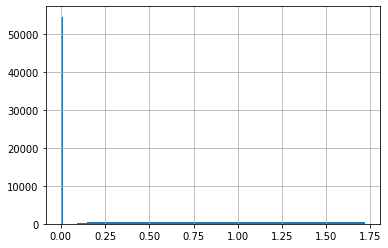

In [229]:
indirim_bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 
                0.06, 0.07, 0.08, 0.09, 0.10, 
                0.15, pasifik_df_sorted.indirim__.max()+1]
#indirim_bins = [0, 0.009, 0.05, 0.10, 0.15, 0.20, 0.25, 0.50, pasifik_df_sorted.indirim__.max()+1]
pasifik_df_sorted.indirim__.hist(bins=indirim_bins)
len(indirim_bins) , pasifik_df_sorted.indirim__.value_counts(bins=indirim_bins).sort_index()
pasifik_df_sorted['indirim__bins'] = pd.cut(pasifik_df_sorted.indirim__, indirim_bins).cat.codes

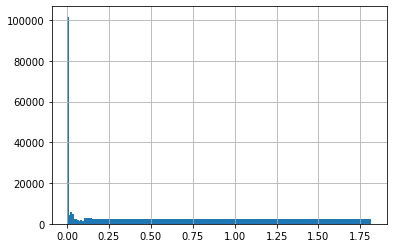

In [230]:
indirim_bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 
                0.06, 0.07, 0.08, 0.09, 0.10, 
                0.15, horizon_saha_df_sorted.indirim__.max()+1]
horizon_saha_df_sorted.indirim__.hist(bins=indirim_bins)
len(indirim_bins) , horizon_saha_df_sorted.indirim__.value_counts(bins=indirim_bins)
horizon_saha_df_sorted['indirim__bins'] = pd.cut(horizon_saha_df_sorted.indirim__, indirim_bins).cat.codes

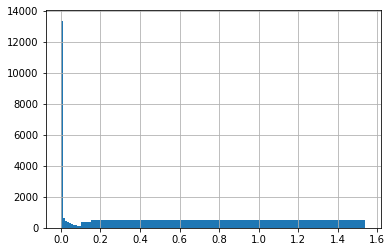

In [231]:
indirim_bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 
                0.06, 0.07, 0.08, 0.09, 0.10, 
                0.15, btt_df_sorted.indirim__.max()+1]
btt_df_sorted.indirim__.hist(bins=indirim_bins)
len(indirim_bins) , btt_df_sorted.indirim__.value_counts(bins=indirim_bins)
btt_df_sorted['indirim__bins'] = pd.cut(btt_df_sorted.indirim__, indirim_bins).cat.codes

---
# Missing Imputation
---

In [232]:
def missing_imputation(data):
    df_all = []
    data["new_adet"] = data["adet"]
    for sku in data["en_guncel_kod"].unique():
        for grup in data["grup_adi"].unique():
            test = data[(data["en_guncel_kod"] == sku) & (data["grup_adi"] == grup)]
            index_full = list(test[test["new_adet"] != 1].index)
            for idx in range(len(index_full) - 1):
                if index_full[idx+1] - index_full[idx] != 1:
                    index_na = list(range(index_full[idx]+1, index_full[idx+1]))
                    fark = test.loc[index_full[idx+1], "new_adet"] - test.loc[index_full[idx], "new_adet"]
                    bol = len(index_na)
                    ekle = fark/(bol+1)
                    for i in index_na:
                        test.loc[i, "new_adet"] = 0
                        test.loc[i, "new_adet"] += ekle+test.loc[i-1, "new_adet"]
                else:
                    pass
            df_all.append(test)
    df_all = pd.concat(df_all)
    return df_all

In [233]:
pas_backup = pasifik_df_sorted.copy()
hor_backup = horizon_saha_df_sorted.copy()
btt_backup = btt_df_sorted.copy()

In [234]:
pasifik_df_sorted, horizon_saha_df_sorted, btt_df_sorted = missing_imputation(pasifik_df_sorted), missing_imputation(horizon_saha_df_sorted), missing_imputation(btt_df_sorted)

In [235]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Missing imputation işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Missing imputation işlemi 18816 days, 15 saat, 07 dakika, 13.49 saniye sürmüştür.


In [236]:
from statsmodels.tsa.seasonal import STL

In [237]:
pasifik_regression = pasifik_df_sorted.copy()
horizon_regression = horizon_saha_df_sorted.copy()
btt_regression = btt_df_sorted.copy()

In [238]:
pasifik_regression = pasifik_regression[pasifik_regression["new_adet"] != 1].reset_index(drop=True)
horizon_regression = horizon_regression[horizon_regression["new_adet"] != 1].reset_index(drop=True)
btt_regression = btt_regression[btt_regression["new_adet"] != 1].reset_index(drop=True)

In [239]:
def trend_seasonality_decomp(data):
    df_all = []
    for sku in data["en_guncel_kod"].unique():
        for grup in data["grup_adi"].unique():
            temp_df = data[(data["en_guncel_kod"] == sku) & 
                           (data["grup_adi"] == grup)]

            if len(temp_df) > 2:
                df_ts = temp_df[['new_adet','date']]
                df_ts.set_index('date',inplace=True)

                result = STL(df_ts).fit()
                temp_df['season'] = list(result.seasonal)
                temp_df['trend']  = list(result.trend)
                temp_df['residual']  = list(result.resid)
                df_all.append(temp_df)
            else:
                pass
    df_all = pd.concat(df_all)
    return df_all

In [240]:
pasifik_reg = pasifik_df_sorted[pasifik_df_sorted["scope"] == 3]
horizon_reg = horizon_saha_df_sorted[horizon_saha_df_sorted["scope"] == 3]
btt_reg = btt_df_sorted[btt_df_sorted["scope"] == 3]

In [241]:
pasifik_reg = trend_seasonality_decomp(pasifik_reg)
horizon_reg = trend_seasonality_decomp(horizon_reg)
btt_reg = trend_seasonality_decomp(btt_reg)

In [242]:
end = time.time()
total_time = str(timedelta(seconds=end-start))[:-4].split(":")
print(f"Trend ve sezonsallık işlemi {total_time[0]} saat, {total_time[1]} dakika, {total_time[2]} saniye sürmüştür.")

Trend ve sezonsallık işlemi 18816 days, 15 saat, 07 dakika, 27.45 saniye sürmüştür.


In [243]:
pasifik_df_sorted["season"] = np.nan
pasifik_df_sorted["trend"] = np.nan
pasifik_df_sorted["residual"] = np.nan

horizon_saha_df_sorted["season"] = np.nan
horizon_saha_df_sorted["trend"] = np.nan
horizon_saha_df_sorted["residual"] = np.nan

btt_df_sorted["season"] = np.nan
btt_df_sorted["trend"] = np.nan
btt_df_sorted["residual"] = np.nan

In [244]:
pasifik_reg = pasifik_reg[pasifik_reg["new_adet"] != 1]
horizon_reg = horizon_reg[horizon_reg["new_adet"] != 1]
btt_reg = btt_reg[btt_reg["new_adet"] != 1]

In [245]:
pasifik_df = pd.concat([pasifik_df_sorted[pasifik_df_sorted["scope"] != 3], pasifik_reg], axis=0, ignore_index=True)
horizon_df = pd.concat([horizon_saha_df_sorted[horizon_saha_df_sorted["scope"] != 3], horizon_reg], axis=0, ignore_index=True)
btt_df = pd.concat([btt_df_sorted[btt_df_sorted["scope"] != 3], btt_reg], axis=0, ignore_index=True)

---
# Yeni adet flaglendi
---

In [246]:
pasifik_df["adet_flag"] = np.where(pasifik_df["adet"] - pasifik_df["new_adet"] == 0, 0, 1)
horizon_df["adet_flag"] = np.where(horizon_df["adet"] - horizon_df["new_adet"] == 0, 0, 1)
btt_df["adet_flag"] = np.where(btt_df["adet"] - btt_df["new_adet"] == 0, 0, 1)

---
# Gözlemlerin Sırasının Fiyatın Büyükten Küçüğe Sıralanmasına Göre Düzenlenmesi (SKU bazında fiyat benzerliği pattern'i yakalamak amacıyla yapıldı)
---

In [247]:
sorter = pasifik_df.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
pasifik_df_sorted = pasifik_df.copy()
pasifik_df_sorted["sorted"] = pasifik_df_sorted["en_guncel_kod"].map(sorterIndex)
pasifik_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
pasifik_df_sorted.drop('sorted', 1, inplace = True)
pasifik_df_sorted.reset_index(drop=True, inplace=True)

In [248]:
sorter = horizon_df.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
horizon_saha_df_sorted = horizon_df.copy()
horizon_saha_df_sorted["sorted"] = horizon_saha_df_sorted["en_guncel_kod"].map(sorterIndex)
horizon_saha_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
horizon_saha_df_sorted.drop('sorted', 1, inplace = True)
horizon_saha_df_sorted.reset_index(drop=True, inplace=True)

In [249]:
sorter = btt_df.groupby(["en_guncel_kod"]).agg({"fiyat": "max"}).reset_index().sort_values(by="fiyat", ascending=False)["en_guncel_kod"].to_list()
sorterIndex = dict(zip(sorter, range(len(sorter))))
btt_df_sorted = btt_df.copy()
btt_df_sorted["sorted"] = btt_df_sorted["en_guncel_kod"].map(sorterIndex)
btt_df_sorted.sort_values(['sorted', "grup_adi", "yil", "ay"],
        ascending = [True]*4, inplace = True)
btt_df_sorted.drop('sorted', 1, inplace = True)
btt_df_sorted.reset_index(drop=True, inplace=True)

In [250]:
horizon_saha_df_sorted["aktivite_tipi"] = np.nan
btt_df_sorted["aktivite_tipi"] = np.nan

In [251]:
pasifik_df_sorted.rename(columns={'i̇ndirimli_raf_satis_fiyati': 'ciro_kull_i̇ade_dus',
                                  'raf_tavsiye_satis_fiyati': 'promosyon_tutari'}, inplace=True)

In [252]:
pasifik_df_sorted["Kanal"] = "pasifik"
horizon_saha_df_sorted["Kanal"] = "horizon"
btt_df_sorted["Kanal"] = "btt"

In [253]:
scope_dict = {0: "kapsam_disi", 1: "ortalama_basilacak", 2: "ts", 3: "regresyon"}

In [254]:
pasifik_df_sorted["scope_type"] = pasifik_df_sorted["scope"].map(scope_dict)
horizon_saha_df_sorted["scope_type"] = horizon_saha_df_sorted["scope"].map(scope_dict)
btt_df_sorted["scope_type"] = btt_df_sorted["scope"].map(scope_dict)

In [255]:
df_all = pd.concat([pasifik_df_sorted, horizon_saha_df_sorted, btt_df_sorted], axis=0, ignore_index=True)

---
# Kapsamı yeniden düzenleme
---

In [256]:
kapsam_all_new_cols = []
for col in kapsam_all.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            kapsam_all_new_cols.append(col)
        else:
            pass

In [257]:
kapsam_all.columns = kapsam_all_new_cols

In [258]:
kapsam_all["urun_kodu"] = kapsam_all["urun_kodu"].apply(lambda x: int(x.split("-")[0]+x.split("-")[1]))

In [259]:
eslenik_kod_df_new_cols = []
for col in eslenik_kod_df.columns.str.lower():
    for letter in range(len(chng_letters)):
        col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
        if letter == len(chng_letters) - 1:
            eslenik_kod_df_new_cols.append(col)
        else:
            pass

In [260]:
eslenik_kod_df.columns = eslenik_kod_df_new_cols

In [262]:
kapsam_all = kapsam_all.merge(eslenik_kod_df[["urun_kodu", "en_guncel_kod"]], how="left", on="urun_kodu")

In [263]:
kapsam_all["en_guncel_kod"].fillna(kapsam_all["urun_kodu"], inplace=True)

In [266]:
kapsam_all.drop_duplicates(subset=["en_guncel_kod"], inplace=True, ignore_index=True)
kapsam_all = kapsam_all[kapsam_all["en_guncel_kod"] != "delist"].reset_index(drop=True)

In [267]:
df_all_pas = df_all[df_all["Kanal"] == "pasifik"]
df_all_pas_haric = df_all[df_all["Kanal"] != "pasifik"]

In [268]:
df_all_pas = df_all_pas.merge(kapsam_all[["en_guncel_kod", "grup_adi", "durum"]], how="left", on=["en_guncel_kod", "grup_adi"])

In [270]:
df_all_pas_haric["durum"] = np.nan

In [271]:
df_all2 = pd.concat([df_all_pas, df_all_pas_haric], axis=0, ignore_index=True)

In [272]:
change_scope_index = df_all2[(df_all2["portfoy"] == 1) & 
                             (df_all2["Kanal"] == "pasifik") & 
                             (df_all2["durum"] != "LİSTELİ") & 
                             (~df_all2["grup_adi"].isin(["Diğer_Pasifik", "MİGROS"]))].index

In [273]:
df_all2.loc[change_scope_index, "scope"] = 0
df_all2.loc[change_scope_index, "scope_type"] = "kapsam_disi"

In [274]:
aktivite_dict = {0:0, 'Mağaza içi/Dağılım':2, 'İn&out':5, 
                 'Çoklu Alım':8, 'Mutluluk':11, 'Kasiyer':14, 'CRM':17}

df_all2.aktivite_tipi.fillna(0, inplace=True)
df_all2.aktivite_tipi = df_all2.aktivite_tipi.map(aktivite_dict)

---
# Datanın dışarıya aktarılması
### Fiyata Göre Sıralanmış Datanın Dışarıya Aktarılması
---

In [285]:
df_all2.to_csv("../data/_all_data.csv", index=False)

In [286]:
df_all2.to_excel("../data/_all_data.xlsx", index=False)

In [418]:
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("\Data prep çalışma süresi: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

\Data prep çalışma süresi: 451375:51:54.02


---
# Kontrol
---

In [709]:
pasifik_df_sorted[(pasifik_df_sorted["scope"] == 0) & (pasifik_df_sorted["portfoy"] == 1)][["en_guncel_kod", "grup_adi"]].drop_duplicates().reset_index(drop=True)

,en_guncel_kod,grup_adi
0,23103,BİM
1,65309,BİM
2,142701,A101
3,157605,A101
4,157605,BİM
5,20600,BİM
6,149909,A101
7,143007,BİM
8,142906,A101
9,142908,A101


In [698]:
print("Pasifik Kapsam Dışı SKU:", len(list(pasifik_df_sorted[(pasifik_df_sorted["scope"] == 0) & (pasifik_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("Horizon Kapsam Dışı SKU:", len(list(horizon_saha_df_sorted[(horizon_saha_df_sorted["scope"] == 0) & (horizon_saha_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("BTT Kapsam Dışı SKU    :", len(list(btt_df_sorted[(btt_df_sorted["scope"] == 0) & (btt_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print()
print("Pasifik Ortalama Basılacak SKU:", len(list(pasifik_df_sorted[(pasifik_df_sorted["scope"] == 1) & (pasifik_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("Horizon Ortalama Basılacak SKU:", len(list(horizon_saha_df_sorted[(horizon_saha_df_sorted["scope"] == 1) & (horizon_saha_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("BTT Ortalama Basılacak SKU    :", len(list(btt_df_sorted[(btt_df_sorted["scope"] == 1) & (btt_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print()
print("Pasifik Sürekli SKU:", len(list(pasifik_df_sorted[(pasifik_df_sorted["scope"] == 2) & (pasifik_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("Horizon Sürekli SKU:", len(list(horizon_saha_df_sorted[(horizon_saha_df_sorted["scope"] == 2) & (horizon_saha_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("BTT Sürekli SKU    :", len(list(btt_df_sorted[(btt_df_sorted["scope"] == 2) & (btt_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print()
print("Pasifik Kesikli SKU:", len(list(pasifik_df_sorted[(pasifik_df_sorted["scope"] == 3) & (pasifik_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("Horizon Kesikli SKU:", len(list(horizon_saha_df_sorted[(horizon_saha_df_sorted["scope"] == 3) & (horizon_saha_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))
print("BTT Kesikli SKU    :", len(list(btt_df_sorted[(btt_df_sorted["scope"] == 3) & (btt_df_sorted["portfoy"] == 1)].en_guncel_kod.drop_duplicates())))

Pasifik Kapsam Dışı SKU: 39
Horizon Kapsam Dışı SKU: 0
BTT Kapsam Dışı SKU    : 0

Pasifik Ortalama Basılacak SKU: 24
Horizon Ortalama Basılacak SKU: 8
BTT Ortalama Basılacak SKU    : 3

Pasifik Sürekli SKU: 78
Horizon Sürekli SKU: 96
BTT Sürekli SKU    : 38

Pasifik Kesikli SKU: 70
Horizon Kesikli SKU: 77
BTT Kesikli SKU    : 15


In [692]:
horizon_saha_df_sorted[(horizon_saha_df_sorted["gozlem_sayisi"] < 24) & 
                       (horizon_saha_df_sorted["oran"] < 0.85) & 
                       ((horizon_saha_df_sorted["bitis_tarih"] < datetime(2020, 12, 1))) & 
                      (horizon_saha_df_sorted["portfoy"] == 1)]

,yil,ay,grup_adi,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,en_guncel_kod,koli_i̇ci_adet,koli,kg,tl,adet,date,portfoy,satis_var,enflasyon_etkisi,yarisma,peak,fiyat,fiyat_gecisi,ciro_kull_i̇ade_dus,promosyon_tutari,indirim__,no_of_days,weekdays_n,weekdays_ratio,weekend_n,weekend_ratio,actual_holiday_n,actual_holiday_ratio,total_holiday_n,total_holiday_ratio,school_day_n,school_day_ratio,school_day_brdg_n,school_day_brdg_ratio,ramadan_n,ramadan_ratio,pandemic,lockdown,gozlem_sayisi,toplam_satir,oran,baslangic_tarih,bitis_tarih,son_kac_ay_eksik,eksik_repeat_sayisi,scope,indirim__bins,new_adet,adet_flag


In [ ]:
pasifik_df_sorted, 24, 0.85, datetime(2020, 12, 1)

In [695]:
pasifik_df_sorted[(pasifik_df_sorted["grup_adi"] == "ŞOK") & (pasifik_df_sorted["urun_adi"] == "Ülker Kare Çikolata - Fındıklı/Üzümlü")][["date", "adet", "indirim__"]]

,date,adet,indirim__


In [688]:
horizon_saha_df_sorted[horizon_saha_df_sorted["scope"] == 2]

,yil,ay,grup_adi,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,en_guncel_kod,koli_i̇ci_adet,koli,kg,tl,adet,date,portfoy,satis_var,enflasyon_etkisi,yarisma,peak,fiyat,fiyat_gecisi,ciro_kull_i̇ade_dus,promosyon_tutari,indirim__,no_of_days,weekdays_n,weekdays_ratio,weekend_n,weekend_ratio,actual_holiday_n,actual_holiday_ratio,total_holiday_n,total_holiday_ratio,school_day_n,school_day_ratio,school_day_brdg_n,school_day_brdg_ratio,ramadan_n,ramadan_ratio,pandemic,lockdown,gozlem_sayisi,toplam_satir,oran,baslangic_tarih,bitis_tarih,son_kac_ay_eksik,eksik_repeat_sayisi,scope,indirim__bins,new_adet,adet_flag
881,2020,6,Diğer_Horizon,ATIŞTIRMALIK,SAKIZ,ONEO,ONEO DUAL BÖĞRTLN ARO.,171308,216.0,10.0,30.000,4795.1997,2160.0,2020-06-01,0.0,1.0,12.62,0,0,479.520000,0.0,4795.1997,NaN,0.000000,30,22,0.7333,8,0.2667,8.0,0.2667,8.0,0.2667,0.0,0.0000,0.0,0.000000,0,0.0,1,0,9,10,0.9,2020-06-01,2021-03-01,0.0,0,2,-1,2160.0,0
882,2020,7,Diğer_Horizon,ATIŞTIRMALIK,SAKIZ,ONEO,ONEO DUAL BÖĞRTLN ARO.,171308,216.0,39.0,117.000,18701.2799,8424.0,2020-07-01,0.0,1.0,11.76,0,0,479.520000,0.0,21578.3998,336.86280,0.064754,31,23,0.7419,8,0.2581,10.5,0.3387,11.0,0.3548,0.0,0.0000,0.0,0.000000,0,0.0,1,0,9,10,0.9,2020-06-01,2021-03-01,0.0,0,2,2,8424.0,0
883,2020,8,Diğer_Horizon,ATIŞTIRMALIK,SAKIZ,ONEO,ONEO DUAL BÖĞRTLN ARO.,171308,216.0,2.0,6.000,959.0400,432.0,2020-08-01,0.0,1.0,11.77,0,0,479.520000,0.0,959.0400,28.77120,0.000000,31,21,0.6774,10,0.3226,11.0,0.3548,11.0,0.3548,0.0,0.0000,0.0,0.000000,0,0.0,1,0,9,10,0.9,2020-06-01,2021-03-01,0.0,0,2,-1,432.0,0
884,2020,9,Diğer_Horizon,ATIŞTIRMALIK,SAKIZ,ONEO,ONEO DUAL BÖĞRTLN ARO.,171308,216.0,7.0,21.049,3356.6400,1512.0,2020-09-01,0.0,1.0,11.75,0,0,479.520000,0.0,3356.6400,64.25560,0.077125,30,22,0.7333,8,0.2667,8.0,0.2667,8.0,0.2667,0.0,0.0000,0.0,0.000000,0,0.0,1,0,9,10,0.9,2020-06-01,2021-03-01,0.0,0,2,2,1512.0,0
885,2020,10,Diğer_Horizon,ATIŞTIRMALIK,SAKIZ,ONEO,ONEO DUAL BÖĞRTLN ARO.,171308,216.0,4.0,12.028,1918.0800,864.0,2020-10-01,0.0,1.0,11.89,0,0,479.520000,0.0,1918.0800,52.02790,0.000000,31,22,0.7097,9,0.2903,10.5,0.3387,11.5,0.3710,20.5,0.6613,19.5,0.629032,0,0.0,1,0,9,10,0.9,2020-06-01,2021-03-01,0.0,0,2,-1,864.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117839,2020,11,YEREL ZİNCİR,ATIŞTIRMALIK,BİSKÜVİ,KRİSPİ,KRİSPİ BAH.ÇUB.KRAKER 45GRx18,108803,15.0,8377.0,5403.165,92984.7000,125655.0,2020-11-01,0.0,1.0,14.03,0,0,9.620000,0.0,95038.2000,2785.81930,0.089539,30,21,0.7000,9,0.3000,9.0,0.3000,9.0,0.3000,0.0,0.0000,0.0,0.000000,0,0.0,1,0,63,63,1.0,2016-01-01,2021-03-01,0.0,0,2,2,125655.0,0
117840,2020,12,YEREL ZİNCİR,ATIŞTIRMALIK,BİSKÜVİ,KRİSPİ,KRİSPİ BAH.ÇUB.KRAKER 45GRx18,108803,15.0,6194.0,3995.130,68753.4000,92910.0,2020-12-01,0.0,1.0,14.60,0,0,9.620000,0.0,69508.2000,2058.35900,0.000000,31,23,0.7419,8,0.2581,8.0,0.2581,8.0,0.2581,0.0,0.0000,0.0,0.000000,0,0.0,1,0,63,63,1.0,2016-01-01,2021-03-01,0.0,0,2,-1,92910.0,0
117841,2021,1,YEREL ZİNCİR,ATIŞTIRMALIK,BİSKÜVİ,KRİSPİ,KRİSPİ BAH.ÇUB.KRAKER 45GRx18,108803,30.0,5879.0,3792.120,65256.9000,88185.0,2021-01-01,0.0,1.0,14.97,0,0,9.620000,0.0,33233.4000,1037.76725,0.000000,31,21,0.6774,10,0.3226,11.0,0.3548,11.0,0.3548,0.0,0.0000,0.0,0.000000,0,0.0,1,0,63,63,1.0,2016-01-01,2021-03-01,0.0,0,2,-1,88185.0,0
117842,2021,2,YEREL ZİNCİR,ATIŞTIRMALIK,BİSKÜVİ,KRİSPİ,KRİSPİ BAH.ÇUB.KRAKER 45GRx18,108803,15.0,9837.0,6344.865,109190.7000,147555.0,2021-02-01,0.0,1.0,15.61,0,0,9.620000,0.0,56909.7000,1750.05510,0.060918,28,20,0.7143,8,0.2857,8.0,0.2857,8.0,0.2857,0.0,0.0000,0.0,0.000000,0,0.0,1,0,63,63,1.0,2016-01-01,2021-03-01,0.0,0,2,2,147555.0,0


In [570]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [572]:
pasifik_df_sorted["adet_flag"] = 0

In [573]:
test = pasifik_df_sorted.copy()

In [574]:
test["adet_flag"] = np.where(test["adet"] - test["new_adet"] == 0, 0, 1)

In [579]:
test[test["adet_flag"] == 0][["adet", "new_adet", "adet_flag"]]

,adet,new_adet,adet_flag
0,31104.0,31104.0,0
1,39312.0,39312.0,0
2,3888.0,3888.0,0
3,10152.0,10152.0,0
4,1728.0,1728.0,0
...,...,...,...
51151,70000.0,70000.0,0
51152,1.0,1.0,0
51153,1.0,1.0,0
51154,1.0,1.0,0


In [571]:
pasifik_df_sorted

,yil,ay,grup_adi,ana_kategori_adi,kategori_adi,marka_adi,urun_adi,en_guncel_kod,koli_i̇ci_adet,koli,kg,tl,adet,date,portfoy,satis_var,enflasyon_etkisi,yarisma,peak,fiyat,fiyat_gecisi,raf_tavsiye_satis_fiyati,i̇ndirimli_raf_satis_fiyati,aktivite_tipi,indirim__,no_of_days,weekdays_n,weekdays_ratio,weekend_n,weekend_ratio,actual_holiday_n,actual_holiday_ratio,total_holiday_n,total_holiday_ratio,school_day_n,school_day_ratio,school_day_brdg_n,school_day_brdg_ratio,ramadan_n,ramadan_ratio,pandemic,lockdown,gozlem_sayisi,toplam_satir,oran,baslangic_tarih,bitis_tarih,son_kac_ay_eksik,eksik_repeat_sayisi,scope,indirim__bins,new_adet
0,2017,3,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216.0,144.0,2177.28,92067.84,31104.0,2017-03-01,0.0,1.0,11.29,0,0,639.360,0.0,NaN,NaN,NaN,0.0,31,23,0.7419,8,0.2581,8.0,0.2581,8.0,0.2581,23.0,0.7419,23.0,0.7419,0,0.0000,0,0,13,49,0.265306,2017-03-01,2019-02-01,24.9,4,0,-1,31104.0
1,2017,4,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216.0,182.0,2751.84,123094.08,39312.0,2017-04-01,0.0,1.0,11.87,0,0,677.664,1.0,NaN,NaN,NaN,0.0,30,20,0.6667,10,0.3333,10.0,0.3333,10.0,0.3333,20.0,0.6667,20.0,0.6667,0,0.0000,0,0,13,49,0.265306,2017-03-01,2019-02-01,24.9,4,0,-1,39312.0
2,2017,5,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216.0,18.0,272.16,12247.20,3888.0,2017-05-01,0.0,1.0,11.72,0,0,680.400,0.0,NaN,NaN,NaN,0.0,31,23,0.7419,8,0.2581,10.0,0.3226,10.0,0.3226,21.0,0.6774,21.0,0.6774,5,0.1613,0,0,13,49,0.265306,2017-03-01,2019-02-01,24.9,4,0,-1,3888.0
3,2017,6,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216.0,47.0,710.64,31978.80,10152.0,2017-06-01,0.0,1.0,10.90,0,0,680.400,0.0,NaN,NaN,NaN,0.0,30,22,0.7333,8,0.2667,10.0,0.3333,10.0,0.3333,7.0,0.2333,7.0,0.2333,24,0.8000,0,0,13,49,0.265306,2017-03-01,2019-02-01,24.9,4,0,-1,10152.0
4,2017,7,Diğer_Pasifik,ATIŞTIRMALIK,ÇİKOLATA,ÜLKER,ULK KARE ÇİK.ANT.FIST.70Gx6x36 STAND,153204,216.0,8.0,120.96,5443.20,1728.0,2017-07-01,0.0,1.0,9.79,0,0,680.400,1.0,NaN,NaN,NaN,0.0,31,21,0.6774,10,0.3226,10.0,0.3226,10.0,0.3226,0.0,0.0000,0.0,0.0000,0,0.0000,0,0,13,49,0.265306,2017-03-01,2019-02-01,24.9,4,0,-1,1728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51151,2020,11,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,20.0,3500.0,2100.00,30100.00,70000.0,2020-11-01,0.0,1.0,14.03,0,0,8.600,0.0,NaN,NaN,NaN,0.0,30,21,0.7000,9,0.3000,9.0,0.3000,9.0,0.3000,0.0,0.0000,0.0,0.0000,0,0.0000,1,0,1,5,0.200000,2020-11-01,2020-11-01,3.9,0,0,-1,70000.0
51152,2020,12,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0.0,0.0,0.00,0.00,1.0,2020-12-01,0.0,0.0,14.60,0,0,NaN,NaN,NaN,NaN,NaN,0.0,31,23,0.7419,8,0.2581,8.0,0.2581,8.0,0.2581,0.0,0.0000,0.0,0.0000,0,0.0000,1,0,1,5,0.200000,2020-11-01,2020-11-01,3.9,0,0,-1,1.0
51153,2021,1,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0.0,0.0,0.00,0.00,1.0,2021-01-01,0.0,0.0,14.97,0,0,NaN,NaN,NaN,NaN,NaN,0.0,31,21,0.6774,10,0.3226,11.0,0.3548,11.0,0.3548,0.0,0.0000,0.0,0.0000,0,0.0000,1,0,1,5,0.200000,2020-11-01,2020-11-01,3.9,0,0,-1,1.0
51154,2021,2,Diğer_Pasifik,ATIŞTIRMALIK,BİSKÜVİ,ÜLKER BEBE,ULK BEBE TAHILLI PROMO 30Gx20,3606,0.0,0.0,0.00,0.00,1.0,2021-02-01,0.0,0.0,15.61,0,0,NaN,NaN,NaN,NaN,NaN,0.0,28,20,0.7143,8,0.2857,8.0,0.2857,8.0,0.2857,0.0,0.0000,0.0,0.0000,0,0.0000,1,0,1,5,0.200000,2020-11-01,2020-11-01,3.9,0,0,-1,1.0


In [265]:
pasifik_df_all.columns

Index(['Yıl', 'Çeyrek', 'Ay', 'Şirket Kodu', 'Grup adı', 'Grup Kodu.',
       'Ana Kategori Adı', 'Kategori Adı', 'Marka Adı', 'Ürün Kodu',
       'Ürün Adı', 'Koli İçi Adet', 'Koli', 'KG', 'TL', 'En Güncel Kod',
       'Adet'],
      dtype='object')

In [266]:
pasifik_df_all[(pasifik_df_all["Ürün Kodu"] == 135903) & (pasifik_df_all["Grup adı"] == "BİM")]

,Yıl,Çeyrek,Ay,Şirket Kodu,Grup adı,Grup Kodu.,Ana Kategori Adı,Kategori Adı,Marka Adı,Ürün Kodu,Ürün Adı,Koli İçi Adet,Koli,KG,TL,En Güncel Kod,Adet
14767,2018,4,11,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,8979.0,38789.28,702516.96,135903,215496.0
17547,2019,1,3,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,8247.0,35627.04,645245.28,135903,197928.0
23585,2019,4,11,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,8219.0,35506.08,708149.04,135903,197256.0
26919,2020,1,3,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,8811.0,38063.52,759155.76,135903,211464.0
29545,2020,2,6,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,8236.0,35579.52,804492.48,135903,197664.0
31300,2020,3,8,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,9556.0,41281.92,933430.08,135903,229344.0
34986,2020,4,12,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,9041.0,39057.12,883124.88,135903,216984.0
41964,2021,2,4,1129,BİM,Z01,ATIŞTIRMALIK,ÇİKOLATA KAPLAMA,ÜLKER ÇİKOLATALI GOFRET,135903,ULK ÇİK.GOF.5x36Gx24,24,9452.0,40832.64,1007205.12,135903,226848.0


In [267]:
df_all[(df_all["grup_adi"] == "BİM") & (df_all["urun_adi"] == "ULK ÇİK.GOF.5x36Gx24")][["date", "en_guncel_kod", "adet", "new_adet", "peak"]]

,date,en_guncel_kod,adet,new_adet,peak
18834,2018-11-01,135903,146211.695184,146211.695184,1
18835,2018-12-01,135903,1.000000,146211.695184,0
18836,2019-01-01,135903,1.000000,146211.695184,0
18837,2019-02-01,135903,1.000000,146211.695184,0
18838,2019-03-01,135903,146211.695184,146211.695184,1
18839,2019-04-01,135903,1.000000,146211.695184,0
18840,2019-05-01,135903,1.000000,146211.695184,0
18841,2019-06-01,135903,1.000000,146211.695184,0
18842,2019-07-01,135903,1.000000,146211.695184,0
18843,2019-08-01,135903,1.000000,146211.695184,0


In [387]:
pd.set_option("display.max.rows", 100)

In [388]:
df_all2[(df_all2["portfoy"] == 1) & (df_all2["durum"].isna()) & 
        (df_all2["grup_adi"].isin(["ŞOK", "BİM", "A101"]))][["en_guncel_kod", "grup_adi"]].drop_duplicates(subset=["en_guncel_kod", "grup_adi"]).to_excel("list.xlsx", index=False)

In [386]:
eslenik_kod_df[eslenik_kod_df["en_guncel_kod"].isin([23103,65309,130608,136502,135901,142701,157605,20603])]

,kod1,kod2,urun_kodu,urun_adi_orjinal,en_guncel_kod
98,20603,00206-03,20603,ULK ÇİK.GOF.EXTRA BİT.45GX18X6,20603
100,23103,00231-03,23103,ULK NAPOLİTEN 33Gx20x6,23103
195,65309,00653-09,65309,LAVİVA DOLG.VE BİSK.ÇİK.35Gx24x6,65309
473,28607,00286-07,28607,DİDO ÇİK.GOF.KLASİK 38Gx24x6,130608
474,130608,01306-08,130608,DİDO SÜT.ÇİK.GOF.35Gx24x6,130608
492,20500,00205-00,20500,ULK.ÇİK.GOF. 39Gx36x6,135901
493,20505,00205-05,20505,ULK ÇİK.GOF.40Gx36x6,135901
494,135901,01359-01,135901,ULK ÇİK.GOF.36Gx36x6,135901
495,135902,01359-02,135902,ULK ÇİK.GOF.36Gx36x4 DISC.,135901
505,136502,01365-02,136502,ULK.ÇİK.GOF. BEYAZ 35Gx36x6,136502


In [395]:
pasifik_df_all2.columns

Index(['Yıl', 'Ay', 'Grup adı', 'Ana Kategori Adı', 'Kategori Adı',
       'Marka Adı', 'Ürün Adı', 'En Güncel Kod', 'Koli İçi Adet', 'Koli', 'KG',
       'TL', 'Adet', 'Date'],
      dtype='object')

In [400]:
pasifik_df_all2[(pasifik_df_all2["En Güncel Kod"] == 39500)]["Grup adı"].unique()

array(['A101', 'Diğer_Pasifik', 'MİGROS', 'ŞOK'], dtype=object)

In [403]:
t = horizon_saha_df_all2[(horizon_saha_df_all2["En Güncel Kod"] == 39500) & (horizon_saha_df_all2["Grup adı"] == "GELENEKSEL KANAL")]

In [410]:
horizon_saha_df_all3.columns

Index(['yil', 'ay', 'grup_adi', 'ana_kategori_adi', 'kategori_adi',
       'marka_adi', 'urun_adi', 'en_guncel_kod', 'koli_i̇ci_adet', 'koli',
       'kg', 'tl', 'adet', 'date', 'portfoy', 'no_of_days', 'weekdays_n',
       'weekdays_ratio', 'weekend_n', 'weekend_ratio', 'actual_holiday_n',
       'actual_holiday_ratio', 'total_holiday_n', 'total_holiday_ratio',
       'school_day_n', 'school_day_ratio', 'school_day_brdg_n',
       'school_day_brdg_ratio', 'ramadan_n', 'ramadan_ratio', 'pandemic',
       'lockdown', 'fiyat', 'fiyat_gecisi', 'ciro_kull_i̇ade_dus',
       'promosyon_tutari', 'i̇skonto_', 'enflasyon_etkisi'],
      dtype='object')

In [411]:
t = horizon_saha_df_all3[(horizon_saha_df_all3["en_guncel_kod"] == 39500) & (horizon_saha_df_all3["grup_adi"] == "GELENEKSEL KANAL")]

In [404]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 20105 to 20402
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Yıl               65 non-null     int64         
 1   Ay                65 non-null     int64         
 2   Grup adı          65 non-null     object        
 3   Ana Kategori Adı  65 non-null     object        
 4   Kategori Adı      65 non-null     object        
 5   Marka Adı         65 non-null     object        
 6   Ürün Adı          65 non-null     object        
 7   En Güncel Kod     65 non-null     object        
 8   Koli İçi Adet     65 non-null     int64         
 9   Koli              65 non-null     int64         
 10  KG                65 non-null     float64       
 11  TL                65 non-null     float64       
 12  Adet              65 non-null     int64         
 13  Date              65 non-null     datetime64[ns]
dtypes: datetime64[ns](1),

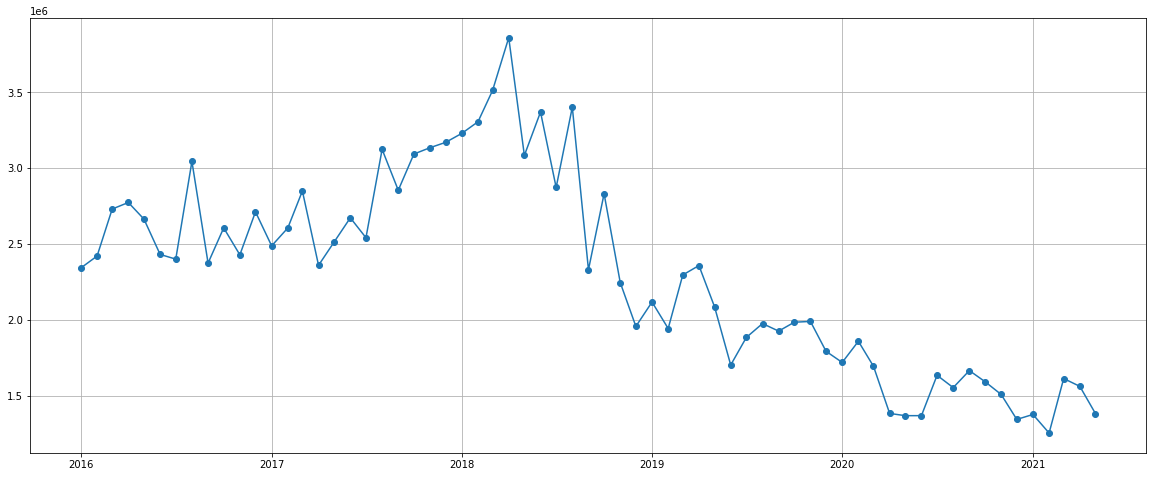

In [413]:
plt.figure(figsize=(20,8))
plt.plot(t["date"], t["adet"], marker="o")
plt.grid()
plt.show()

In [292]:
df_all2[(df_all2["urun_adi"] == "BİSKREM KAKAOLU 100GRx18") & (df_all2["grup_adi"] == "GELENEKSEL KANAL")][["date", "adet", "scope", "peak"]]

,date,adet,scope,peak
142181,2016-01-01,1992366.0,2,0
142182,2016-02-01,2013354.0,2,0
142183,2016-03-01,2289744.0,2,0
142184,2016-04-01,2441412.0,2,0
142185,2016-05-01,2524554.0,2,0
142186,2016-06-01,2167044.0,2,0
142187,2016-07-01,2740872.0,2,1
142188,2016-08-01,2921946.0,2,1
142189,2016-09-01,2714310.0,2,1
142190,2016-10-01,2777784.0,2,1


In [294]:
horizon_saha_df_all3[(horizon_saha_df_all3["urun_adi"] == "BİSKREM KAKAOLU 100GRx18") & (horizon_saha_df_all3["grup_adi"] == "GELENEKSEL KANAL")]["adet"].describe()/10

count         6.500000
mean     219706.763077
std       47930.799333
min      113481.000000
25%      195462.000000
50%      217270.800000
75%      252455.400000
max      340891.200000
Name: adet, dtype: float64